In [5]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [6]:
with open('./results/nopricechange/2-4/traderIDs_501_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [7]:
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_501_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_501_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/2-4/totalOrders_501_5000_100_2_5.csv")

In [4]:
(TtotalOrdersNPC)

Unnamed: 0  time portfolio  stock  order
0                 2   993     pcaot      6    1.0
1                 0   993     vpneq     10    2.0
2                 3   993     vpneq     13   -1.0
3                 2   993     jzndk     14    1.0
4                 1   993     jwivu     13   -2.0
...             ...   ...       ...    ...    ...
2139960           2  5992     khrsl     62    4.0
2139961           0  5992     sujzt     75   -6.0
2139962           1  5992     sujzt     62    4.0
2139963           0  5992     gdnqf     75  -91.0
2139964           1  5992     gdnqf     62   67.0

[2139965 rows x 5 columns]

In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [8]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [9]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades21_npc_501_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  995303
Cascade length:  943
New Orders left:  994360
making new cascade


OG Orders left:  994360
Cascade length:  951
New Orders left:  993409
making new cascade


OG Orders left:  993409
Cascade length:  1139
New Orders left:  992270
making new cascade


OG Orders left:  992270
Cascade length:  600
New Orders left:  991670
making new cascade


OG Orders left:  991670
Cascade length:  726
New Orders left:  990944
making new cascade


OG Orders left:  990944
Cascade length:  850
New Orders left:  990094
making new cascade


OG Orders left:  990094
Cascade length:  548
New Orders left:  989546
making new cascade


OG Orders left:  989546
Cascade length:  1194
New Orders left:  988352
making new cascade


OG Orders left:  988352
Cascade length:  638
New Orders left:  987714
making new cascade


OG Orders left:  987714
Cascade length:  1
New Orders left:  987713
making new cascade


OG Orders left:  987713
Cascade length:  1035
New Orders left:  986678
making new cascade


Cascade length:  419
New Orders left:  949958
making new cascade


OG Orders left:  949958
Cascade length:  82
New Orders left:  949876
making new cascade


OG Orders left:  949876
Cascade length:  950
New Orders left:  948926
making new cascade


OG Orders left:  948926
Cascade length:  359
New Orders left:  948567
making new cascade


OG Orders left:  948567
Cascade length:  68
New Orders left:  948499
making new cascade


OG Orders left:  948499
Cascade length:  159
New Orders left:  948340
making new cascade


OG Orders left:  948340
Cascade length:  340
New Orders left:  948000
making new cascade


OG Orders left:  948000
Cascade length:  580
New Orders left:  947420
making new cascade


OG Orders left:  947420
Cascade length:  778
New Orders left:  946642
making new cascade


OG Orders left:  946642
Cascade length:  553
New Orders left:  946089
making new cascade


OG Orders left:  946089
Cascade length:  838
New Orders left:  945251
making new cascade


OG Orders left:  945251
C

Cascade length:  125
New Orders left:  921690
making new cascade


OG Orders left:  921690
Cascade length:  1
New Orders left:  921689
making new cascade


OG Orders left:  921689
Cascade length:  376
New Orders left:  921313
making new cascade


OG Orders left:  921313
Cascade length:  12
New Orders left:  921301
making new cascade


OG Orders left:  921301
Cascade length:  2
New Orders left:  921299
making new cascade


OG Orders left:  921299
Cascade length:  166
New Orders left:  921133
making new cascade


OG Orders left:  921133
Cascade length:  603
New Orders left:  920530
making new cascade


OG Orders left:  920530
Cascade length:  6
New Orders left:  920524
making new cascade


OG Orders left:  920524
Cascade length:  155
New Orders left:  920369
making new cascade


OG Orders left:  920369
Cascade length:  69
New Orders left:  920300
making new cascade


OG Orders left:  920300
Cascade length:  353
New Orders left:  919947
making new cascade


OG Orders left:  919947
Cascade

Cascade length:  341
New Orders left:  904845
making new cascade


OG Orders left:  904845
Cascade length:  177
New Orders left:  904668
making new cascade


OG Orders left:  904668
Cascade length:  7
New Orders left:  904661
making new cascade


OG Orders left:  904661
Cascade length:  119
New Orders left:  904542
making new cascade


OG Orders left:  904542
Cascade length:  40
New Orders left:  904502
making new cascade


OG Orders left:  904502
Cascade length:  13
New Orders left:  904489
making new cascade


OG Orders left:  904489
Cascade length:  52
New Orders left:  904437
making new cascade


OG Orders left:  904437
Cascade length:  467
New Orders left:  903970
making new cascade


OG Orders left:  903970
Cascade length:  10
New Orders left:  903960
making new cascade


OG Orders left:  903960
Cascade length:  403
New Orders left:  903557
making new cascade


OG Orders left:  903557
Cascade length:  455
New Orders left:  903102
making new cascade


OG Orders left:  903102
Casca

Cascade length:  75
New Orders left:  894424
making new cascade


OG Orders left:  894424
Cascade length:  1
New Orders left:  894423
making new cascade


OG Orders left:  894423
Cascade length:  77
New Orders left:  894346
making new cascade


OG Orders left:  894346
Cascade length:  25
New Orders left:  894321
making new cascade


OG Orders left:  894321
Cascade length:  5
New Orders left:  894316
making new cascade


OG Orders left:  894316
Cascade length:  83
New Orders left:  894233
making new cascade


OG Orders left:  894233
Cascade length:  563
New Orders left:  893670
making new cascade


OG Orders left:  893670
Cascade length:  185
New Orders left:  893485
making new cascade


OG Orders left:  893485
Cascade length:  88
New Orders left:  893397
making new cascade


OG Orders left:  893397
Cascade length:  21
New Orders left:  893376
making new cascade


OG Orders left:  893376
Cascade length:  149
New Orders left:  893227
making new cascade


OG Orders left:  893227
Cascade l

Cascade length:  15
New Orders left:  884042
making new cascade


OG Orders left:  884042
Cascade length:  350
New Orders left:  883692
making new cascade


OG Orders left:  883692
Cascade length:  5
New Orders left:  883687
making new cascade


OG Orders left:  883687
Cascade length:  40
New Orders left:  883647
making new cascade


OG Orders left:  883647
Cascade length:  137
New Orders left:  883510
making new cascade


OG Orders left:  883510
Cascade length:  16
New Orders left:  883494
making new cascade


OG Orders left:  883494
Cascade length:  8
New Orders left:  883486
making new cascade


OG Orders left:  883486
Cascade length:  20
New Orders left:  883466
making new cascade


OG Orders left:  883466
Cascade length:  7
New Orders left:  883459
making new cascade


OG Orders left:  883459
Cascade length:  443
New Orders left:  883016
making new cascade


OG Orders left:  883016
Cascade length:  4
New Orders left:  883012
making new cascade


OG Orders left:  883012
Cascade len

Cascade length:  3
New Orders left:  874927
making new cascade


OG Orders left:  874927
Cascade length:  163
New Orders left:  874764
making new cascade


OG Orders left:  874764
Cascade length:  30
New Orders left:  874734
making new cascade


OG Orders left:  874734
Cascade length:  445
New Orders left:  874289
making new cascade


OG Orders left:  874289
Cascade length:  77
New Orders left:  874212
making new cascade


OG Orders left:  874212
Cascade length:  2
New Orders left:  874210
making new cascade


OG Orders left:  874210
Cascade length:  1
New Orders left:  874209
making new cascade


OG Orders left:  874209
Cascade length:  105
New Orders left:  874104
making new cascade


OG Orders left:  874104
Cascade length:  31
New Orders left:  874073
making new cascade


OG Orders left:  874073
Cascade length:  8
New Orders left:  874065
making new cascade


OG Orders left:  874065
Cascade length:  7
New Orders left:  874058
making new cascade


OG Orders left:  874058
Cascade leng

Cascade length:  70
New Orders left:  866296
making new cascade


OG Orders left:  866296
Cascade length:  6
New Orders left:  866290
making new cascade


OG Orders left:  866290
Cascade length:  28
New Orders left:  866262
making new cascade


OG Orders left:  866262
Cascade length:  9
New Orders left:  866253
making new cascade


OG Orders left:  866253
Cascade length:  5
New Orders left:  866248
making new cascade


OG Orders left:  866248
Cascade length:  127
New Orders left:  866121
making new cascade


OG Orders left:  866121
Cascade length:  35
New Orders left:  866086
making new cascade


OG Orders left:  866086
Cascade length:  433
New Orders left:  865653
making new cascade


OG Orders left:  865653
Cascade length:  206
New Orders left:  865447
making new cascade


OG Orders left:  865447
Cascade length:  152
New Orders left:  865295
making new cascade


OG Orders left:  865295
Cascade length:  22
New Orders left:  865273
making new cascade


OG Orders left:  865273
Cascade l

Cascade length:  346
New Orders left:  858179
making new cascade


OG Orders left:  858179
Cascade length:  17
New Orders left:  858162
making new cascade


OG Orders left:  858162
Cascade length:  14
New Orders left:  858148
making new cascade


OG Orders left:  858148
Cascade length:  1
New Orders left:  858147
making new cascade


OG Orders left:  858147
Cascade length:  288
New Orders left:  857859
making new cascade


OG Orders left:  857859
Cascade length:  2
New Orders left:  857857
making new cascade


OG Orders left:  857857
Cascade length:  58
New Orders left:  857799
making new cascade


OG Orders left:  857799
Cascade length:  104
New Orders left:  857695
making new cascade


OG Orders left:  857695
Cascade length:  38
New Orders left:  857657
making new cascade


OG Orders left:  857657
Cascade length:  140
New Orders left:  857517
making new cascade


OG Orders left:  857517
Cascade length:  25
New Orders left:  857492
making new cascade


OG Orders left:  857492
Cascade 

Cascade length:  8
New Orders left:  851059
making new cascade


OG Orders left:  851059
Cascade length:  33
New Orders left:  851026
making new cascade


OG Orders left:  851026
Cascade length:  20
New Orders left:  851006
making new cascade


OG Orders left:  851006
Cascade length:  16
New Orders left:  850990
making new cascade


OG Orders left:  850990
Cascade length:  15
New Orders left:  850975
making new cascade


OG Orders left:  850975
Cascade length:  64
New Orders left:  850911
making new cascade


OG Orders left:  850911
Cascade length:  145
New Orders left:  850766
making new cascade


OG Orders left:  850766
Cascade length:  19
New Orders left:  850747
making new cascade


OG Orders left:  850747
Cascade length:  80
New Orders left:  850667
making new cascade


OG Orders left:  850667
Cascade length:  19
New Orders left:  850648
making new cascade


OG Orders left:  850648
Cascade length:  109
New Orders left:  850539
making new cascade


OG Orders left:  850539
Cascade l

Cascade length:  363
New Orders left:  846264
making new cascade


OG Orders left:  846264
Cascade length:  43
New Orders left:  846221
making new cascade


OG Orders left:  846221
Cascade length:  5
New Orders left:  846216
making new cascade


OG Orders left:  846216
Cascade length:  55
New Orders left:  846161
making new cascade


OG Orders left:  846161
Cascade length:  14
New Orders left:  846147
making new cascade


OG Orders left:  846147
Cascade length:  144
New Orders left:  846003
making new cascade


OG Orders left:  846003
Cascade length:  48
New Orders left:  845955
making new cascade


OG Orders left:  845955
Cascade length:  403
New Orders left:  845552
making new cascade


OG Orders left:  845552
Cascade length:  179
New Orders left:  845373
making new cascade


OG Orders left:  845373
Cascade length:  1
New Orders left:  845372
making new cascade


OG Orders left:  845372
Cascade length:  9
New Orders left:  845363
making new cascade


OG Orders left:  845363
Cascade l

Cascade length:  47
New Orders left:  840215
making new cascade


OG Orders left:  840215
Cascade length:  132
New Orders left:  840083
making new cascade


OG Orders left:  840083
Cascade length:  26
New Orders left:  840057
making new cascade


OG Orders left:  840057
Cascade length:  161
New Orders left:  839896
making new cascade


OG Orders left:  839896
Cascade length:  266
New Orders left:  839630
making new cascade


OG Orders left:  839630
Cascade length:  4
New Orders left:  839626
making new cascade


OG Orders left:  839626
Cascade length:  1
New Orders left:  839625
making new cascade


OG Orders left:  839625
Cascade length:  2
New Orders left:  839623
making new cascade


OG Orders left:  839623
Cascade length:  4
New Orders left:  839619
making new cascade


OG Orders left:  839619
Cascade length:  105
New Orders left:  839514
making new cascade


OG Orders left:  839514
Cascade length:  13
New Orders left:  839501
making new cascade


OG Orders left:  839501
Cascade le

Cascade length:  121
New Orders left:  832235
making new cascade


OG Orders left:  832235
Cascade length:  62
New Orders left:  832173
making new cascade


OG Orders left:  832173
Cascade length:  159
New Orders left:  832014
making new cascade


OG Orders left:  832014
Cascade length:  82
New Orders left:  831932
making new cascade


OG Orders left:  831932
Cascade length:  109
New Orders left:  831823
making new cascade


OG Orders left:  831823
Cascade length:  1
New Orders left:  831822
making new cascade


OG Orders left:  831822
Cascade length:  36
New Orders left:  831786
making new cascade


OG Orders left:  831786
Cascade length:  2
New Orders left:  831784
making new cascade


OG Orders left:  831784
Cascade length:  57
New Orders left:  831727
making new cascade


OG Orders left:  831727
Cascade length:  173
New Orders left:  831554
making new cascade


OG Orders left:  831554
Cascade length:  1
New Orders left:  831553
making new cascade


OG Orders left:  831553
Cascade l

Cascade length:  17
New Orders left:  824973
making new cascade


OG Orders left:  824973
Cascade length:  281
New Orders left:  824692
making new cascade


OG Orders left:  824692
Cascade length:  26
New Orders left:  824666
making new cascade


OG Orders left:  824666
Cascade length:  15
New Orders left:  824651
making new cascade


OG Orders left:  824651
Cascade length:  41
New Orders left:  824610
making new cascade


OG Orders left:  824610
Cascade length:  97
New Orders left:  824513
making new cascade


OG Orders left:  824513
Cascade length:  7
New Orders left:  824506
making new cascade


OG Orders left:  824506
Cascade length:  147
New Orders left:  824359
making new cascade


OG Orders left:  824359
Cascade length:  69
New Orders left:  824290
making new cascade


OG Orders left:  824290
Cascade length:  68
New Orders left:  824222
making new cascade


OG Orders left:  824222
Cascade length:  49
New Orders left:  824173
making new cascade


OG Orders left:  824173
Cascade l

Cascade length:  80
New Orders left:  818197
making new cascade


OG Orders left:  818197
Cascade length:  10
New Orders left:  818187
making new cascade


OG Orders left:  818187
Cascade length:  85
New Orders left:  818102
making new cascade


OG Orders left:  818102
Cascade length:  27
New Orders left:  818075
making new cascade


OG Orders left:  818075
Cascade length:  231
New Orders left:  817844
making new cascade


OG Orders left:  817844
Cascade length:  9
New Orders left:  817835
making new cascade


OG Orders left:  817835
Cascade length:  26
New Orders left:  817809
making new cascade


OG Orders left:  817809
Cascade length:  21
New Orders left:  817788
making new cascade


OG Orders left:  817788
Cascade length:  190
New Orders left:  817598
making new cascade


OG Orders left:  817598
Cascade length:  3
New Orders left:  817595
making new cascade


OG Orders left:  817595
Cascade length:  6
New Orders left:  817589
making new cascade


OG Orders left:  817589
Cascade len

Cascade length:  41
New Orders left:  812064
making new cascade


OG Orders left:  812064
Cascade length:  4
New Orders left:  812060
making new cascade


OG Orders left:  812060
Cascade length:  39
New Orders left:  812021
making new cascade


OG Orders left:  812021
Cascade length:  34
New Orders left:  811987
making new cascade


OG Orders left:  811987
Cascade length:  270
New Orders left:  811717
making new cascade


OG Orders left:  811717
Cascade length:  1
New Orders left:  811716
making new cascade


OG Orders left:  811716
Cascade length:  34
New Orders left:  811682
making new cascade


OG Orders left:  811682
Cascade length:  8
New Orders left:  811674
making new cascade


OG Orders left:  811674
Cascade length:  17
New Orders left:  811657
making new cascade


OG Orders left:  811657
Cascade length:  3
New Orders left:  811654
making new cascade


OG Orders left:  811654
Cascade length:  1
New Orders left:  811653
making new cascade


OG Orders left:  811653
Cascade length

Cascade length:  4
New Orders left:  806532
making new cascade


OG Orders left:  806532
Cascade length:  11
New Orders left:  806521
making new cascade


OG Orders left:  806521
Cascade length:  25
New Orders left:  806496
making new cascade


OG Orders left:  806496
Cascade length:  7
New Orders left:  806489
making new cascade


OG Orders left:  806489
Cascade length:  21
New Orders left:  806468
making new cascade


OG Orders left:  806468
Cascade length:  153
New Orders left:  806315
making new cascade


OG Orders left:  806315
Cascade length:  46
New Orders left:  806269
making new cascade


OG Orders left:  806269
Cascade length:  17
New Orders left:  806252
making new cascade


OG Orders left:  806252
Cascade length:  6
New Orders left:  806246
making new cascade


OG Orders left:  806246
Cascade length:  54
New Orders left:  806192
making new cascade


OG Orders left:  806192
Cascade length:  5
New Orders left:  806187
making new cascade


OG Orders left:  806187
Cascade lengt

Cascade length:  149
New Orders left:  799911
making new cascade


OG Orders left:  799911
Cascade length:  1
New Orders left:  799910
making new cascade


OG Orders left:  799910
Cascade length:  147
New Orders left:  799763
making new cascade


OG Orders left:  799763
Cascade length:  64
New Orders left:  799699
making new cascade


OG Orders left:  799699
Cascade length:  6
New Orders left:  799693
making new cascade


OG Orders left:  799693
Cascade length:  20
New Orders left:  799673
making new cascade


OG Orders left:  799673
Cascade length:  15
New Orders left:  799658
making new cascade


OG Orders left:  799658
Cascade length:  5
New Orders left:  799653
making new cascade


OG Orders left:  799653
Cascade length:  121
New Orders left:  799532
making new cascade


OG Orders left:  799532
Cascade length:  67
New Orders left:  799465
making new cascade


OG Orders left:  799465
Cascade length:  145
New Orders left:  799320
making new cascade


OG Orders left:  799320
Cascade l

Cascade length:  3
New Orders left:  794014
making new cascade


OG Orders left:  794014
Cascade length:  17
New Orders left:  793997
making new cascade


OG Orders left:  793997
Cascade length:  23
New Orders left:  793974
making new cascade


OG Orders left:  793974
Cascade length:  4
New Orders left:  793970
making new cascade


OG Orders left:  793970
Cascade length:  41
New Orders left:  793929
making new cascade


OG Orders left:  793929
Cascade length:  1
New Orders left:  793928
making new cascade


OG Orders left:  793928
Cascade length:  8
New Orders left:  793920
making new cascade


OG Orders left:  793920
Cascade length:  58
New Orders left:  793862
making new cascade


OG Orders left:  793862
Cascade length:  84
New Orders left:  793778
making new cascade


OG Orders left:  793778
Cascade length:  73
New Orders left:  793705
making new cascade


OG Orders left:  793705
Cascade length:  158
New Orders left:  793547
making new cascade


OG Orders left:  793547
Cascade lengt

Cascade length:  35
New Orders left:  789230
making new cascade


OG Orders left:  789230
Cascade length:  18
New Orders left:  789212
making new cascade


OG Orders left:  789212
Cascade length:  10
New Orders left:  789202
making new cascade


OG Orders left:  789202
Cascade length:  381
New Orders left:  788821
making new cascade


OG Orders left:  788821
Cascade length:  19
New Orders left:  788802
making new cascade


OG Orders left:  788802
Cascade length:  3
New Orders left:  788799
making new cascade


OG Orders left:  788799
Cascade length:  11
New Orders left:  788788
making new cascade


OG Orders left:  788788
Cascade length:  224
New Orders left:  788564
making new cascade


OG Orders left:  788564
Cascade length:  47
New Orders left:  788517
making new cascade


OG Orders left:  788517
Cascade length:  1
New Orders left:  788516
making new cascade


OG Orders left:  788516
Cascade length:  174
New Orders left:  788342
making new cascade


OG Orders left:  788342
Cascade l

Cascade length:  218
New Orders left:  781127
making new cascade


OG Orders left:  781127
Cascade length:  2
New Orders left:  781125
making new cascade


OG Orders left:  781125
Cascade length:  1
New Orders left:  781124
making new cascade


OG Orders left:  781124
Cascade length:  94
New Orders left:  781030
making new cascade


OG Orders left:  781030
Cascade length:  113
New Orders left:  780917
making new cascade


OG Orders left:  780917
Cascade length:  115
New Orders left:  780802
making new cascade


OG Orders left:  780802
Cascade length:  8
New Orders left:  780794
making new cascade


OG Orders left:  780794
Cascade length:  10
New Orders left:  780784
making new cascade


OG Orders left:  780784
Cascade length:  230
New Orders left:  780554
making new cascade


OG Orders left:  780554
Cascade length:  21
New Orders left:  780533
making new cascade


OG Orders left:  780533
Cascade length:  12
New Orders left:  780521
making new cascade


OG Orders left:  780521
Cascade l

Cascade length:  143
New Orders left:  774156
making new cascade


OG Orders left:  774156
Cascade length:  1
New Orders left:  774155
making new cascade


OG Orders left:  774155
Cascade length:  113
New Orders left:  774042
making new cascade


OG Orders left:  774042
Cascade length:  48
New Orders left:  773994
making new cascade


OG Orders left:  773994
Cascade length:  28
New Orders left:  773966
making new cascade


OG Orders left:  773966
Cascade length:  32
New Orders left:  773934
making new cascade


OG Orders left:  773934
Cascade length:  73
New Orders left:  773861
making new cascade


OG Orders left:  773861
Cascade length:  11
New Orders left:  773850
making new cascade


OG Orders left:  773850
Cascade length:  138
New Orders left:  773712
making new cascade


OG Orders left:  773712
Cascade length:  3
New Orders left:  773709
making new cascade


OG Orders left:  773709
Cascade length:  15
New Orders left:  773694
making new cascade


OG Orders left:  773694
Cascade l

Cascade length:  9
New Orders left:  766709
making new cascade


OG Orders left:  766709
Cascade length:  3
New Orders left:  766706
making new cascade


OG Orders left:  766706
Cascade length:  4
New Orders left:  766702
making new cascade


OG Orders left:  766702
Cascade length:  132
New Orders left:  766570
making new cascade


OG Orders left:  766570
Cascade length:  54
New Orders left:  766516
making new cascade


OG Orders left:  766516
Cascade length:  126
New Orders left:  766390
making new cascade


OG Orders left:  766390
Cascade length:  1
New Orders left:  766389
making new cascade


OG Orders left:  766389
Cascade length:  156
New Orders left:  766233
making new cascade


OG Orders left:  766233
Cascade length:  22
New Orders left:  766211
making new cascade


OG Orders left:  766211
Cascade length:  90
New Orders left:  766121
making new cascade


OG Orders left:  766121
Cascade length:  174
New Orders left:  765947
making new cascade


OG Orders left:  765947
Cascade le

Cascade length:  90
New Orders left:  756183
making new cascade


OG Orders left:  756183
Cascade length:  109
New Orders left:  756074
making new cascade


OG Orders left:  756074
Cascade length:  168
New Orders left:  755906
making new cascade


OG Orders left:  755906
Cascade length:  270
New Orders left:  755636
making new cascade


OG Orders left:  755636
Cascade length:  129
New Orders left:  755507
making new cascade


OG Orders left:  755507
Cascade length:  95
New Orders left:  755412
making new cascade


OG Orders left:  755412
Cascade length:  102
New Orders left:  755310
making new cascade


OG Orders left:  755310
Cascade length:  17
New Orders left:  755293
making new cascade


OG Orders left:  755293
Cascade length:  22
New Orders left:  755271
making new cascade


OG Orders left:  755271
Cascade length:  213
New Orders left:  755058
making new cascade


OG Orders left:  755058
Cascade length:  11
New Orders left:  755047
making new cascade


OG Orders left:  755047
Casc

Cascade length:  18
New Orders left:  747927
making new cascade


OG Orders left:  747927
Cascade length:  244
New Orders left:  747683
making new cascade


OG Orders left:  747683
Cascade length:  72
New Orders left:  747611
making new cascade


OG Orders left:  747611
Cascade length:  36
New Orders left:  747575
making new cascade


OG Orders left:  747575
Cascade length:  64
New Orders left:  747511
making new cascade


OG Orders left:  747511
Cascade length:  27
New Orders left:  747484
making new cascade


OG Orders left:  747484
Cascade length:  88
New Orders left:  747396
making new cascade


OG Orders left:  747396
Cascade length:  84
New Orders left:  747312
making new cascade


OG Orders left:  747312
Cascade length:  20
New Orders left:  747292
making new cascade


OG Orders left:  747292
Cascade length:  20
New Orders left:  747272
making new cascade


OG Orders left:  747272
Cascade length:  252
New Orders left:  747020
making new cascade


OG Orders left:  747020
Cascade 

Cascade length:  5
New Orders left:  739325
making new cascade


OG Orders left:  739325
Cascade length:  9
New Orders left:  739316
making new cascade


OG Orders left:  739316
Cascade length:  165
New Orders left:  739151
making new cascade


OG Orders left:  739151
Cascade length:  29
New Orders left:  739122
making new cascade


OG Orders left:  739122
Cascade length:  471
New Orders left:  738651
making new cascade


OG Orders left:  738651
Cascade length:  295
New Orders left:  738356
making new cascade


OG Orders left:  738356
Cascade length:  5
New Orders left:  738351
making new cascade


OG Orders left:  738351
Cascade length:  226
New Orders left:  738125
making new cascade


OG Orders left:  738125
Cascade length:  101
New Orders left:  738024
making new cascade


OG Orders left:  738024
Cascade length:  126
New Orders left:  737898
making new cascade


OG Orders left:  737898
Cascade length:  142
New Orders left:  737756
making new cascade


OG Orders left:  737756
Cascad

Cascade length:  25
New Orders left:  726227
making new cascade


OG Orders left:  726227
Cascade length:  1
New Orders left:  726226
making new cascade


OG Orders left:  726226
Cascade length:  6
New Orders left:  726220
making new cascade


OG Orders left:  726220
Cascade length:  2
New Orders left:  726218
making new cascade


OG Orders left:  726218
Cascade length:  126
New Orders left:  726092
making new cascade


OG Orders left:  726092
Cascade length:  19
New Orders left:  726073
making new cascade


OG Orders left:  726073
Cascade length:  146
New Orders left:  725927
making new cascade


OG Orders left:  725927
Cascade length:  22
New Orders left:  725905
making new cascade


OG Orders left:  725905
Cascade length:  13
New Orders left:  725892
making new cascade


OG Orders left:  725892
Cascade length:  41
New Orders left:  725851
making new cascade


OG Orders left:  725851
Cascade length:  182
New Orders left:  725669
making new cascade


OG Orders left:  725669
Cascade le

Cascade length:  14
New Orders left:  717593
making new cascade


OG Orders left:  717593
Cascade length:  9
New Orders left:  717584
making new cascade


OG Orders left:  717584
Cascade length:  12
New Orders left:  717572
making new cascade


OG Orders left:  717572
Cascade length:  9
New Orders left:  717563
making new cascade


OG Orders left:  717563
Cascade length:  13
New Orders left:  717550
making new cascade


OG Orders left:  717550
Cascade length:  14
New Orders left:  717536
making new cascade


OG Orders left:  717536
Cascade length:  30
New Orders left:  717506
making new cascade


OG Orders left:  717506
Cascade length:  6
New Orders left:  717500
making new cascade


OG Orders left:  717500
Cascade length:  544
New Orders left:  716956
making new cascade


OG Orders left:  716956
Cascade length:  126
New Orders left:  716830
making new cascade


OG Orders left:  716830
Cascade length:  72
New Orders left:  716758
making new cascade


OG Orders left:  716758
Cascade len

Cascade length:  10
New Orders left:  708162
making new cascade


OG Orders left:  708162
Cascade length:  2
New Orders left:  708160
making new cascade


OG Orders left:  708160
Cascade length:  59
New Orders left:  708101
making new cascade


OG Orders left:  708101
Cascade length:  248
New Orders left:  707853
making new cascade


OG Orders left:  707853
Cascade length:  33
New Orders left:  707820
making new cascade


OG Orders left:  707820
Cascade length:  1
New Orders left:  707819
making new cascade


OG Orders left:  707819
Cascade length:  16
New Orders left:  707803
making new cascade


OG Orders left:  707803
Cascade length:  90
New Orders left:  707713
making new cascade


OG Orders left:  707713
Cascade length:  22
New Orders left:  707691
making new cascade


OG Orders left:  707691
Cascade length:  12
New Orders left:  707679
making new cascade


OG Orders left:  707679
Cascade length:  116
New Orders left:  707563
making new cascade


OG Orders left:  707563
Cascade le

Cascade length:  383
New Orders left:  697081
making new cascade


OG Orders left:  697081
Cascade length:  595
New Orders left:  696486
making new cascade


OG Orders left:  696486
Cascade length:  5
New Orders left:  696481
making new cascade


OG Orders left:  696481
Cascade length:  3
New Orders left:  696478
making new cascade


OG Orders left:  696478
Cascade length:  6
New Orders left:  696472
making new cascade


OG Orders left:  696472
Cascade length:  39
New Orders left:  696433
making new cascade


OG Orders left:  696433
Cascade length:  69
New Orders left:  696364
making new cascade


OG Orders left:  696364
Cascade length:  8
New Orders left:  696356
making new cascade


OG Orders left:  696356
Cascade length:  109
New Orders left:  696247
making new cascade


OG Orders left:  696247
Cascade length:  171
New Orders left:  696076
making new cascade


OG Orders left:  696076
Cascade length:  80
New Orders left:  695996
making new cascade


OG Orders left:  695996
Cascade le

Cascade length:  47
New Orders left:  688245
making new cascade


OG Orders left:  688245
Cascade length:  21
New Orders left:  688224
making new cascade


OG Orders left:  688224
Cascade length:  220
New Orders left:  688004
making new cascade


OG Orders left:  688004
Cascade length:  10
New Orders left:  687994
making new cascade


OG Orders left:  687994
Cascade length:  8
New Orders left:  687986
making new cascade


OG Orders left:  687986
Cascade length:  521
New Orders left:  687465
making new cascade


OG Orders left:  687465
Cascade length:  177
New Orders left:  687288
making new cascade


OG Orders left:  687288
Cascade length:  4
New Orders left:  687284
making new cascade


OG Orders left:  687284
Cascade length:  241
New Orders left:  687043
making new cascade


OG Orders left:  687043
Cascade length:  11
New Orders left:  687032
making new cascade


OG Orders left:  687032
Cascade length:  46
New Orders left:  686986
making new cascade


OG Orders left:  686986
Cascade 

Cascade length:  539
New Orders left:  680079
making new cascade


OG Orders left:  680079
Cascade length:  5
New Orders left:  680074
making new cascade


OG Orders left:  680074
Cascade length:  46
New Orders left:  680028
making new cascade


OG Orders left:  680028
Cascade length:  162
New Orders left:  679866
making new cascade


OG Orders left:  679866
Cascade length:  308
New Orders left:  679558
making new cascade


OG Orders left:  679558
Cascade length:  340
New Orders left:  679218
making new cascade


OG Orders left:  679218
Cascade length:  207
New Orders left:  679011
making new cascade


OG Orders left:  679011
Cascade length:  82
New Orders left:  678929
making new cascade


OG Orders left:  678929
Cascade length:  5
New Orders left:  678924
making new cascade


OG Orders left:  678924
Cascade length:  1
New Orders left:  678923
making new cascade


OG Orders left:  678923
Cascade length:  30
New Orders left:  678893
making new cascade


OG Orders left:  678893
Cascade 

Cascade length:  24
New Orders left:  669702
making new cascade


OG Orders left:  669702
Cascade length:  182
New Orders left:  669520
making new cascade


OG Orders left:  669520
Cascade length:  1
New Orders left:  669519
making new cascade


OG Orders left:  669519
Cascade length:  1
New Orders left:  669518
making new cascade


OG Orders left:  669518
Cascade length:  13
New Orders left:  669505
making new cascade


OG Orders left:  669505
Cascade length:  320
New Orders left:  669185
making new cascade


OG Orders left:  669185
Cascade length:  4
New Orders left:  669181
making new cascade


OG Orders left:  669181
Cascade length:  23
New Orders left:  669158
making new cascade


OG Orders left:  669158
Cascade length:  32
New Orders left:  669126
making new cascade


OG Orders left:  669126
Cascade length:  53
New Orders left:  669073
making new cascade


OG Orders left:  669073
Cascade length:  89
New Orders left:  668984
making new cascade


OG Orders left:  668984
Cascade len

Cascade length:  155
New Orders left:  661176
making new cascade


OG Orders left:  661176
Cascade length:  419
New Orders left:  660757
making new cascade


OG Orders left:  660757
Cascade length:  58
New Orders left:  660699
making new cascade


OG Orders left:  660699
Cascade length:  380
New Orders left:  660319
making new cascade


OG Orders left:  660319
Cascade length:  138
New Orders left:  660181
making new cascade


OG Orders left:  660181
Cascade length:  6
New Orders left:  660175
making new cascade


OG Orders left:  660175
Cascade length:  1
New Orders left:  660174
making new cascade


OG Orders left:  660174
Cascade length:  27
New Orders left:  660147
making new cascade


OG Orders left:  660147
Cascade length:  213
New Orders left:  659934
making new cascade


OG Orders left:  659934
Cascade length:  19
New Orders left:  659915
making new cascade


OG Orders left:  659915
Cascade length:  36
New Orders left:  659879
making new cascade


OG Orders left:  659879
Cascade

Cascade length:  2
New Orders left:  649584
making new cascade


OG Orders left:  649584
Cascade length:  22
New Orders left:  649562
making new cascade


OG Orders left:  649562
Cascade length:  42
New Orders left:  649520
making new cascade


OG Orders left:  649520
Cascade length:  16
New Orders left:  649504
making new cascade


OG Orders left:  649504
Cascade length:  7
New Orders left:  649497
making new cascade


OG Orders left:  649497
Cascade length:  288
New Orders left:  649209
making new cascade


OG Orders left:  649209
Cascade length:  171
New Orders left:  649038
making new cascade


OG Orders left:  649038
Cascade length:  8
New Orders left:  649030
making new cascade


OG Orders left:  649030
Cascade length:  133
New Orders left:  648897
making new cascade


OG Orders left:  648897
Cascade length:  2
New Orders left:  648895
making new cascade


OG Orders left:  648895
Cascade length:  630
New Orders left:  648265
making new cascade


OG Orders left:  648265
Cascade le

Cascade length:  12
New Orders left:  638560
making new cascade


OG Orders left:  638560
Cascade length:  350
New Orders left:  638210
making new cascade


OG Orders left:  638210
Cascade length:  38
New Orders left:  638172
making new cascade


OG Orders left:  638172
Cascade length:  146
New Orders left:  638026
making new cascade


OG Orders left:  638026
Cascade length:  218
New Orders left:  637808
making new cascade


OG Orders left:  637808
Cascade length:  16
New Orders left:  637792
making new cascade


OG Orders left:  637792
Cascade length:  25
New Orders left:  637767
making new cascade


OG Orders left:  637767
Cascade length:  38
New Orders left:  637729
making new cascade


OG Orders left:  637729
Cascade length:  47
New Orders left:  637682
making new cascade


OG Orders left:  637682
Cascade length:  288
New Orders left:  637394
making new cascade


OG Orders left:  637394
Cascade length:  20
New Orders left:  637374
making new cascade


OG Orders left:  637374
Cascad

Cascade length:  469
New Orders left:  626756
making new cascade


OG Orders left:  626756
Cascade length:  19
New Orders left:  626737
making new cascade


OG Orders left:  626737
Cascade length:  341
New Orders left:  626396
making new cascade


OG Orders left:  626396
Cascade length:  19
New Orders left:  626377
making new cascade


OG Orders left:  626377
Cascade length:  13
New Orders left:  626364
making new cascade


OG Orders left:  626364
Cascade length:  9
New Orders left:  626355
making new cascade


OG Orders left:  626355
Cascade length:  448
New Orders left:  625907
making new cascade


OG Orders left:  625907
Cascade length:  20
New Orders left:  625887
making new cascade


OG Orders left:  625887
Cascade length:  14
New Orders left:  625873
making new cascade


OG Orders left:  625873
Cascade length:  199
New Orders left:  625674
making new cascade


OG Orders left:  625674
Cascade length:  102
New Orders left:  625572
making new cascade


OG Orders left:  625572
Cascad

Cascade length:  8
New Orders left:  616894
making new cascade


OG Orders left:  616894
Cascade length:  28
New Orders left:  616866
making new cascade


OG Orders left:  616866
Cascade length:  4
New Orders left:  616862
making new cascade


OG Orders left:  616862
Cascade length:  379
New Orders left:  616483
making new cascade


OG Orders left:  616483
Cascade length:  12
New Orders left:  616471
making new cascade


OG Orders left:  616471
Cascade length:  12
New Orders left:  616459
making new cascade


OG Orders left:  616459
Cascade length:  16
New Orders left:  616443
making new cascade


OG Orders left:  616443
Cascade length:  210
New Orders left:  616233
making new cascade


OG Orders left:  616233
Cascade length:  3
New Orders left:  616230
making new cascade


OG Orders left:  616230
Cascade length:  304
New Orders left:  615926
making new cascade


OG Orders left:  615926
Cascade length:  23
New Orders left:  615903
making new cascade


OG Orders left:  615903
Cascade le

Cascade length:  13
New Orders left:  609294
making new cascade


OG Orders left:  609294
Cascade length:  1
New Orders left:  609293
making new cascade


OG Orders left:  609293
Cascade length:  191
New Orders left:  609102
making new cascade


OG Orders left:  609102
Cascade length:  4
New Orders left:  609098
making new cascade


OG Orders left:  609098
Cascade length:  36
New Orders left:  609062
making new cascade


OG Orders left:  609062
Cascade length:  43
New Orders left:  609019
making new cascade


OG Orders left:  609019
Cascade length:  66
New Orders left:  608953
making new cascade


OG Orders left:  608953
Cascade length:  10
New Orders left:  608943
making new cascade


OG Orders left:  608943
Cascade length:  223
New Orders left:  608720
making new cascade


OG Orders left:  608720
Cascade length:  62
New Orders left:  608658
making new cascade


OG Orders left:  608658
Cascade length:  100
New Orders left:  608558
making new cascade


OG Orders left:  608558
Cascade l

Cascade length:  406
New Orders left:  601040
making new cascade


OG Orders left:  601040
Cascade length:  135
New Orders left:  600905
making new cascade


OG Orders left:  600905
Cascade length:  1
New Orders left:  600904
making new cascade


OG Orders left:  600904
Cascade length:  19
New Orders left:  600885
making new cascade


OG Orders left:  600885
Cascade length:  64
New Orders left:  600821
making new cascade


OG Orders left:  600821
Cascade length:  125
New Orders left:  600696
making new cascade


OG Orders left:  600696
Cascade length:  84
New Orders left:  600612
making new cascade


OG Orders left:  600612
Cascade length:  10
New Orders left:  600602
making new cascade


OG Orders left:  600602
Cascade length:  566
New Orders left:  600036
making new cascade


OG Orders left:  600036
Cascade length:  227
New Orders left:  599809
making new cascade


OG Orders left:  599809
Cascade length:  240
New Orders left:  599569
making new cascade


OG Orders left:  599569
Casca

Cascade length:  296
New Orders left:  588854
making new cascade


OG Orders left:  588854
Cascade length:  23
New Orders left:  588831
making new cascade


OG Orders left:  588831
Cascade length:  264
New Orders left:  588567
making new cascade


OG Orders left:  588567
Cascade length:  12
New Orders left:  588555
making new cascade


OG Orders left:  588555
Cascade length:  52
New Orders left:  588503
making new cascade


OG Orders left:  588503
Cascade length:  1
New Orders left:  588502
making new cascade


OG Orders left:  588502
Cascade length:  31
New Orders left:  588471
making new cascade


OG Orders left:  588471
Cascade length:  7
New Orders left:  588464
making new cascade


OG Orders left:  588464
Cascade length:  367
New Orders left:  588097
making new cascade


OG Orders left:  588097
Cascade length:  229
New Orders left:  587868
making new cascade


OG Orders left:  587868
Cascade length:  304
New Orders left:  587564
making new cascade


OG Orders left:  587564
Cascade

Cascade length:  264
New Orders left:  580805
making new cascade


OG Orders left:  580805
Cascade length:  1
New Orders left:  580804
making new cascade


OG Orders left:  580804
Cascade length:  12
New Orders left:  580792
making new cascade


OG Orders left:  580792
Cascade length:  3
New Orders left:  580789
making new cascade


OG Orders left:  580789
Cascade length:  15
New Orders left:  580774
making new cascade


OG Orders left:  580774
Cascade length:  371
New Orders left:  580403
making new cascade


OG Orders left:  580403
Cascade length:  6
New Orders left:  580397
making new cascade


OG Orders left:  580397
Cascade length:  35
New Orders left:  580362
making new cascade


OG Orders left:  580362
Cascade length:  12
New Orders left:  580350
making new cascade


OG Orders left:  580350
Cascade length:  69
New Orders left:  580281
making new cascade


OG Orders left:  580281
Cascade length:  339
New Orders left:  579942
making new cascade


OG Orders left:  579942
Cascade le

Cascade length:  33
New Orders left:  572010
making new cascade


OG Orders left:  572010
Cascade length:  40
New Orders left:  571970
making new cascade


OG Orders left:  571970
Cascade length:  49
New Orders left:  571921
making new cascade


OG Orders left:  571921
Cascade length:  7
New Orders left:  571914
making new cascade


OG Orders left:  571914
Cascade length:  12
New Orders left:  571902
making new cascade


OG Orders left:  571902
Cascade length:  128
New Orders left:  571774
making new cascade


OG Orders left:  571774
Cascade length:  24
New Orders left:  571750
making new cascade


OG Orders left:  571750
Cascade length:  50
New Orders left:  571700
making new cascade


OG Orders left:  571700
Cascade length:  163
New Orders left:  571537
making new cascade


OG Orders left:  571537
Cascade length:  14
New Orders left:  571523
making new cascade


OG Orders left:  571523
Cascade length:  2
New Orders left:  571521
making new cascade


OG Orders left:  571521
Cascade le

Cascade length:  91
New Orders left:  564280
making new cascade


OG Orders left:  564280
Cascade length:  2
New Orders left:  564278
making new cascade


OG Orders left:  564278
Cascade length:  12
New Orders left:  564266
making new cascade


OG Orders left:  564266
Cascade length:  50
New Orders left:  564216
making new cascade


OG Orders left:  564216
Cascade length:  106
New Orders left:  564110
making new cascade


OG Orders left:  564110
Cascade length:  31
New Orders left:  564079
making new cascade


OG Orders left:  564079
Cascade length:  28
New Orders left:  564051
making new cascade


OG Orders left:  564051
Cascade length:  47
New Orders left:  564004
making new cascade


OG Orders left:  564004
Cascade length:  49
New Orders left:  563955
making new cascade


OG Orders left:  563955
Cascade length:  140
New Orders left:  563815
making new cascade


OG Orders left:  563815
Cascade length:  19
New Orders left:  563796
making new cascade


OG Orders left:  563796
Cascade l

Cascade length:  8
New Orders left:  557128
making new cascade


OG Orders left:  557128
Cascade length:  138
New Orders left:  556990
making new cascade


OG Orders left:  556990
Cascade length:  10
New Orders left:  556980
making new cascade


OG Orders left:  556980
Cascade length:  6
New Orders left:  556974
making new cascade


OG Orders left:  556974
Cascade length:  87
New Orders left:  556887
making new cascade


OG Orders left:  556887
Cascade length:  18
New Orders left:  556869
making new cascade


OG Orders left:  556869
Cascade length:  4
New Orders left:  556865
making new cascade


OG Orders left:  556865
Cascade length:  5
New Orders left:  556860
making new cascade


OG Orders left:  556860
Cascade length:  203
New Orders left:  556657
making new cascade


OG Orders left:  556657
Cascade length:  230
New Orders left:  556427
making new cascade


OG Orders left:  556427
Cascade length:  502
New Orders left:  555925
making new cascade


OG Orders left:  555925
Cascade le

Cascade length:  44
New Orders left:  546235
making new cascade


OG Orders left:  546235
Cascade length:  6
New Orders left:  546229
making new cascade


OG Orders left:  546229
Cascade length:  13
New Orders left:  546216
making new cascade


OG Orders left:  546216
Cascade length:  29
New Orders left:  546187
making new cascade


OG Orders left:  546187
Cascade length:  1
New Orders left:  546186
making new cascade


OG Orders left:  546186
Cascade length:  425
New Orders left:  545761
making new cascade


OG Orders left:  545761
Cascade length:  13
New Orders left:  545748
making new cascade


OG Orders left:  545748
Cascade length:  230
New Orders left:  545518
making new cascade


OG Orders left:  545518
Cascade length:  157
New Orders left:  545361
making new cascade


OG Orders left:  545361
Cascade length:  3
New Orders left:  545358
making new cascade


OG Orders left:  545358
Cascade length:  5
New Orders left:  545353
making new cascade


OG Orders left:  545353
Cascade len

Cascade length:  232
New Orders left:  536560
making new cascade


OG Orders left:  536560
Cascade length:  122
New Orders left:  536438
making new cascade


OG Orders left:  536438
Cascade length:  78
New Orders left:  536360
making new cascade


OG Orders left:  536360
Cascade length:  156
New Orders left:  536204
making new cascade


OG Orders left:  536204
Cascade length:  129
New Orders left:  536075
making new cascade


OG Orders left:  536075
Cascade length:  13
New Orders left:  536062
making new cascade


OG Orders left:  536062
Cascade length:  10
New Orders left:  536052
making new cascade


OG Orders left:  536052
Cascade length:  91
New Orders left:  535961
making new cascade


OG Orders left:  535961
Cascade length:  6
New Orders left:  535955
making new cascade


OG Orders left:  535955
Cascade length:  1
New Orders left:  535954
making new cascade


OG Orders left:  535954
Cascade length:  84
New Orders left:  535870
making new cascade


OG Orders left:  535870
Cascade 

Cascade length:  2
New Orders left:  530115
making new cascade


OG Orders left:  530115
Cascade length:  17
New Orders left:  530098
making new cascade


OG Orders left:  530098
Cascade length:  43
New Orders left:  530055
making new cascade


OG Orders left:  530055
Cascade length:  130
New Orders left:  529925
making new cascade


OG Orders left:  529925
Cascade length:  100
New Orders left:  529825
making new cascade


OG Orders left:  529825
Cascade length:  2
New Orders left:  529823
making new cascade


OG Orders left:  529823
Cascade length:  448
New Orders left:  529375
making new cascade


OG Orders left:  529375
Cascade length:  76
New Orders left:  529299
making new cascade


OG Orders left:  529299
Cascade length:  38
New Orders left:  529261
making new cascade


OG Orders left:  529261
Cascade length:  2
New Orders left:  529259
making new cascade


OG Orders left:  529259
Cascade length:  2
New Orders left:  529257
making new cascade


OG Orders left:  529257
Cascade len

Cascade length:  71
New Orders left:  522988
making new cascade


OG Orders left:  522988
Cascade length:  116
New Orders left:  522872
making new cascade


OG Orders left:  522872
Cascade length:  77
New Orders left:  522795
making new cascade


OG Orders left:  522795
Cascade length:  6
New Orders left:  522789
making new cascade


OG Orders left:  522789
Cascade length:  14
New Orders left:  522775
making new cascade


OG Orders left:  522775
Cascade length:  88
New Orders left:  522687
making new cascade


OG Orders left:  522687
Cascade length:  346
New Orders left:  522341
making new cascade


OG Orders left:  522341
Cascade length:  2
New Orders left:  522339
making new cascade


OG Orders left:  522339
Cascade length:  7
New Orders left:  522332
making new cascade


OG Orders left:  522332
Cascade length:  133
New Orders left:  522199
making new cascade


OG Orders left:  522199
Cascade length:  42
New Orders left:  522157
making new cascade


OG Orders left:  522157
Cascade le

Cascade length:  89
New Orders left:  512054
making new cascade


OG Orders left:  512054
Cascade length:  3
New Orders left:  512051
making new cascade


OG Orders left:  512051
Cascade length:  54
New Orders left:  511997
making new cascade


OG Orders left:  511997
Cascade length:  49
New Orders left:  511948
making new cascade


OG Orders left:  511948
Cascade length:  33
New Orders left:  511915
making new cascade


OG Orders left:  511915
Cascade length:  1
New Orders left:  511914
making new cascade


OG Orders left:  511914
Cascade length:  52
New Orders left:  511862
making new cascade


OG Orders left:  511862
Cascade length:  88
New Orders left:  511774
making new cascade


OG Orders left:  511774
Cascade length:  45
New Orders left:  511729
making new cascade


OG Orders left:  511729
Cascade length:  438
New Orders left:  511291
making new cascade


OG Orders left:  511291
Cascade length:  516
New Orders left:  510775
making new cascade


OG Orders left:  510775
Cascade le

Cascade length:  86
New Orders left:  496895
making new cascade


OG Orders left:  496895
Cascade length:  537
New Orders left:  496358
making new cascade


OG Orders left:  496358
Cascade length:  1
New Orders left:  496357
making new cascade


OG Orders left:  496357
Cascade length:  67
New Orders left:  496290
making new cascade


OG Orders left:  496290
Cascade length:  73
New Orders left:  496217
making new cascade


OG Orders left:  496217
Cascade length:  23
New Orders left:  496194
making new cascade


OG Orders left:  496194
Cascade length:  196
New Orders left:  495998
making new cascade


OG Orders left:  495998
Cascade length:  40
New Orders left:  495958
making new cascade


OG Orders left:  495958
Cascade length:  689
New Orders left:  495269
making new cascade


OG Orders left:  495269
Cascade length:  9
New Orders left:  495260
making new cascade


OG Orders left:  495260
Cascade length:  600
New Orders left:  494660
making new cascade


OG Orders left:  494660
Cascade 

Cascade length:  2
New Orders left:  481225
making new cascade


OG Orders left:  481225
Cascade length:  226
New Orders left:  480999
making new cascade


OG Orders left:  480999
Cascade length:  11
New Orders left:  480988
making new cascade


OG Orders left:  480988
Cascade length:  10
New Orders left:  480978
making new cascade


OG Orders left:  480978
Cascade length:  7
New Orders left:  480971
making new cascade


OG Orders left:  480971
Cascade length:  302
New Orders left:  480669
making new cascade


OG Orders left:  480669
Cascade length:  7
New Orders left:  480662
making new cascade


OG Orders left:  480662
Cascade length:  580
New Orders left:  480082
making new cascade


OG Orders left:  480082
Cascade length:  12
New Orders left:  480070
making new cascade


OG Orders left:  480070
Cascade length:  2
New Orders left:  480068
making new cascade


OG Orders left:  480068
Cascade length:  2
New Orders left:  480066
making new cascade


OG Orders left:  480066
Cascade leng

Cascade length:  299
New Orders left:  470508
making new cascade


OG Orders left:  470508
Cascade length:  1
New Orders left:  470507
making new cascade


OG Orders left:  470507
Cascade length:  2
New Orders left:  470505
making new cascade


OG Orders left:  470505
Cascade length:  369
New Orders left:  470136
making new cascade


OG Orders left:  470136
Cascade length:  1
New Orders left:  470135
making new cascade


OG Orders left:  470135
Cascade length:  6
New Orders left:  470129
making new cascade


OG Orders left:  470129
Cascade length:  15
New Orders left:  470114
making new cascade


OG Orders left:  470114
Cascade length:  530
New Orders left:  469584
making new cascade


OG Orders left:  469584
Cascade length:  5
New Orders left:  469579
making new cascade


OG Orders left:  469579
Cascade length:  31
New Orders left:  469548
making new cascade


OG Orders left:  469548
Cascade length:  130
New Orders left:  469418
making new cascade


OG Orders left:  469418
Cascade len

Cascade length:  54
New Orders left:  458982
making new cascade


OG Orders left:  458982
Cascade length:  460
New Orders left:  458522
making new cascade


OG Orders left:  458522
Cascade length:  546
New Orders left:  457976
making new cascade


OG Orders left:  457976
Cascade length:  87
New Orders left:  457889
making new cascade


OG Orders left:  457889
Cascade length:  62
New Orders left:  457827
making new cascade


OG Orders left:  457827
Cascade length:  156
New Orders left:  457671
making new cascade


OG Orders left:  457671
Cascade length:  62
New Orders left:  457609
making new cascade


OG Orders left:  457609
Cascade length:  177
New Orders left:  457432
making new cascade


OG Orders left:  457432
Cascade length:  54
New Orders left:  457378
making new cascade


OG Orders left:  457378
Cascade length:  2
New Orders left:  457376
making new cascade


OG Orders left:  457376
Cascade length:  61
New Orders left:  457315
making new cascade


OG Orders left:  457315
Cascade

Cascade length:  29
New Orders left:  445789
making new cascade


OG Orders left:  445789
Cascade length:  46
New Orders left:  445743
making new cascade


OG Orders left:  445743
Cascade length:  5
New Orders left:  445738
making new cascade


OG Orders left:  445738
Cascade length:  63
New Orders left:  445675
making new cascade


OG Orders left:  445675
Cascade length:  44
New Orders left:  445631
making new cascade


OG Orders left:  445631
Cascade length:  520
New Orders left:  445111
making new cascade


OG Orders left:  445111
Cascade length:  21
New Orders left:  445090
making new cascade


OG Orders left:  445090
Cascade length:  388
New Orders left:  444702
making new cascade


OG Orders left:  444702
Cascade length:  9
New Orders left:  444693
making new cascade


OG Orders left:  444693
Cascade length:  342
New Orders left:  444351
making new cascade


OG Orders left:  444351
Cascade length:  64
New Orders left:  444287
making new cascade


OG Orders left:  444287
Cascade l

Cascade length:  6
New Orders left:  431432
making new cascade


OG Orders left:  431432
Cascade length:  43
New Orders left:  431389
making new cascade


OG Orders left:  431389
Cascade length:  15
New Orders left:  431374
making new cascade


OG Orders left:  431374
Cascade length:  42
New Orders left:  431332
making new cascade


OG Orders left:  431332
Cascade length:  322
New Orders left:  431010
making new cascade


OG Orders left:  431010
Cascade length:  9
New Orders left:  431001
making new cascade


OG Orders left:  431001
Cascade length:  45
New Orders left:  430956
making new cascade


OG Orders left:  430956
Cascade length:  224
New Orders left:  430732
making new cascade


OG Orders left:  430732
Cascade length:  1
New Orders left:  430731
making new cascade


OG Orders left:  430731
Cascade length:  2
New Orders left:  430729
making new cascade


OG Orders left:  430729
Cascade length:  659
New Orders left:  430070
making new cascade


OG Orders left:  430070
Cascade len

Cascade length:  118
New Orders left:  421061
making new cascade


OG Orders left:  421061
Cascade length:  47
New Orders left:  421014
making new cascade


OG Orders left:  421014
Cascade length:  19
New Orders left:  420995
making new cascade


OG Orders left:  420995
Cascade length:  221
New Orders left:  420774
making new cascade


OG Orders left:  420774
Cascade length:  639
New Orders left:  420135
making new cascade


OG Orders left:  420135
Cascade length:  1
New Orders left:  420134
making new cascade


OG Orders left:  420134
Cascade length:  3
New Orders left:  420131
making new cascade


OG Orders left:  420131
Cascade length:  1
New Orders left:  420130
making new cascade


OG Orders left:  420130
Cascade length:  38
New Orders left:  420092
making new cascade


OG Orders left:  420092
Cascade length:  1
New Orders left:  420091
making new cascade


OG Orders left:  420091
Cascade length:  30
New Orders left:  420061
making new cascade


OG Orders left:  420061
Cascade len

Cascade length:  1
New Orders left:  410888
making new cascade


OG Orders left:  410888
Cascade length:  1
New Orders left:  410887
making new cascade


OG Orders left:  410887
Cascade length:  51
New Orders left:  410836
making new cascade


OG Orders left:  410836
Cascade length:  497
New Orders left:  410339
making new cascade


OG Orders left:  410339
Cascade length:  179
New Orders left:  410160
making new cascade


OG Orders left:  410160
Cascade length:  6
New Orders left:  410154
making new cascade


OG Orders left:  410154
Cascade length:  663
New Orders left:  409491
making new cascade


OG Orders left:  409491
Cascade length:  50
New Orders left:  409441
making new cascade


OG Orders left:  409441
Cascade length:  173
New Orders left:  409268
making new cascade


OG Orders left:  409268
Cascade length:  196
New Orders left:  409072
making new cascade


OG Orders left:  409072
Cascade length:  41
New Orders left:  409031
making new cascade


OG Orders left:  409031
Cascade 

Cascade length:  69
New Orders left:  400434
making new cascade


OG Orders left:  400434
Cascade length:  3
New Orders left:  400431
making new cascade


OG Orders left:  400431
Cascade length:  8
New Orders left:  400423
making new cascade


OG Orders left:  400423
Cascade length:  121
New Orders left:  400302
making new cascade


OG Orders left:  400302
Cascade length:  28
New Orders left:  400274
making new cascade


OG Orders left:  400274
Cascade length:  180
New Orders left:  400094
making new cascade


OG Orders left:  400094
Cascade length:  435
New Orders left:  399659
making new cascade


OG Orders left:  399659
Cascade length:  4
New Orders left:  399655
making new cascade


OG Orders left:  399655
Cascade length:  269
New Orders left:  399386
making new cascade


OG Orders left:  399386
Cascade length:  16
New Orders left:  399370
making new cascade


OG Orders left:  399370
Cascade length:  4
New Orders left:  399366
making new cascade


OG Orders left:  399366
Cascade le

Cascade length:  65
New Orders left:  387785
making new cascade


OG Orders left:  387785
Cascade length:  104
New Orders left:  387681
making new cascade


OG Orders left:  387681
Cascade length:  228
New Orders left:  387453
making new cascade


OG Orders left:  387453
Cascade length:  45
New Orders left:  387408
making new cascade


OG Orders left:  387408
Cascade length:  6
New Orders left:  387402
making new cascade


OG Orders left:  387402
Cascade length:  375
New Orders left:  387027
making new cascade


OG Orders left:  387027
Cascade length:  429
New Orders left:  386598
making new cascade


OG Orders left:  386598
Cascade length:  7
New Orders left:  386591
making new cascade


OG Orders left:  386591
Cascade length:  67
New Orders left:  386524
making new cascade


OG Orders left:  386524
Cascade length:  645
New Orders left:  385879
making new cascade


OG Orders left:  385879
Cascade length:  4
New Orders left:  385875
making new cascade


OG Orders left:  385875
Cascade 

Cascade length:  120
New Orders left:  375479
making new cascade


OG Orders left:  375479
Cascade length:  11
New Orders left:  375468
making new cascade


OG Orders left:  375468
Cascade length:  23
New Orders left:  375445
making new cascade


OG Orders left:  375445
Cascade length:  4
New Orders left:  375441
making new cascade


OG Orders left:  375441
Cascade length:  420
New Orders left:  375021
making new cascade


OG Orders left:  375021
Cascade length:  50
New Orders left:  374971
making new cascade


OG Orders left:  374971
Cascade length:  102
New Orders left:  374869
making new cascade


OG Orders left:  374869
Cascade length:  345
New Orders left:  374524
making new cascade


OG Orders left:  374524
Cascade length:  2
New Orders left:  374522
making new cascade


OG Orders left:  374522
Cascade length:  564
New Orders left:  373958
making new cascade


OG Orders left:  373958
Cascade length:  46
New Orders left:  373912
making new cascade


OG Orders left:  373912
Cascade

Cascade length:  64
New Orders left:  362402
making new cascade


OG Orders left:  362402
Cascade length:  123
New Orders left:  362279
making new cascade


OG Orders left:  362279
Cascade length:  14
New Orders left:  362265
making new cascade


OG Orders left:  362265
Cascade length:  394
New Orders left:  361871
making new cascade


OG Orders left:  361871
Cascade length:  94
New Orders left:  361777
making new cascade


OG Orders left:  361777
Cascade length:  3
New Orders left:  361774
making new cascade


OG Orders left:  361774
Cascade length:  121
New Orders left:  361653
making new cascade


OG Orders left:  361653
Cascade length:  96
New Orders left:  361557
making new cascade


OG Orders left:  361557
Cascade length:  162
New Orders left:  361395
making new cascade


OG Orders left:  361395
Cascade length:  361
New Orders left:  361034
making new cascade


OG Orders left:  361034
Cascade length:  6
New Orders left:  361028
making new cascade


OG Orders left:  361028
Cascade

Cascade length:  3
New Orders left:  351887
making new cascade


OG Orders left:  351887
Cascade length:  196
New Orders left:  351691
making new cascade


OG Orders left:  351691
Cascade length:  36
New Orders left:  351655
making new cascade


OG Orders left:  351655
Cascade length:  3
New Orders left:  351652
making new cascade


OG Orders left:  351652
Cascade length:  120
New Orders left:  351532
making new cascade


OG Orders left:  351532
Cascade length:  51
New Orders left:  351481
making new cascade


OG Orders left:  351481
Cascade length:  10
New Orders left:  351471
making new cascade


OG Orders left:  351471
Cascade length:  83
New Orders left:  351388
making new cascade


OG Orders left:  351388
Cascade length:  65
New Orders left:  351323
making new cascade


OG Orders left:  351323
Cascade length:  382
New Orders left:  350941
making new cascade


OG Orders left:  350941
Cascade length:  94
New Orders left:  350847
making new cascade


OG Orders left:  350847
Cascade l

Cascade length:  12
New Orders left:  344968
making new cascade


OG Orders left:  344968
Cascade length:  14
New Orders left:  344954
making new cascade


OG Orders left:  344954
Cascade length:  5
New Orders left:  344949
making new cascade


OG Orders left:  344949
Cascade length:  3
New Orders left:  344946
making new cascade


OG Orders left:  344946
Cascade length:  74
New Orders left:  344872
making new cascade


OG Orders left:  344872
Cascade length:  18
New Orders left:  344854
making new cascade


OG Orders left:  344854
Cascade length:  4
New Orders left:  344850
making new cascade


OG Orders left:  344850
Cascade length:  8
New Orders left:  344842
making new cascade


OG Orders left:  344842
Cascade length:  1
New Orders left:  344841
making new cascade


OG Orders left:  344841
Cascade length:  9
New Orders left:  344832
making new cascade


OG Orders left:  344832
Cascade length:  150
New Orders left:  344682
making new cascade


OG Orders left:  344682
Cascade length:

Cascade length:  40
New Orders left:  340174
making new cascade


OG Orders left:  340174
Cascade length:  129
New Orders left:  340045
making new cascade


OG Orders left:  340045
Cascade length:  35
New Orders left:  340010
making new cascade


OG Orders left:  340010
Cascade length:  154
New Orders left:  339856
making new cascade


OG Orders left:  339856
Cascade length:  52
New Orders left:  339804
making new cascade


OG Orders left:  339804
Cascade length:  2
New Orders left:  339802
making new cascade


OG Orders left:  339802
Cascade length:  171
New Orders left:  339631
making new cascade


OG Orders left:  339631
Cascade length:  27
New Orders left:  339604
making new cascade


OG Orders left:  339604
Cascade length:  19
New Orders left:  339585
making new cascade


OG Orders left:  339585
Cascade length:  12
New Orders left:  339573
making new cascade


OG Orders left:  339573
Cascade length:  22
New Orders left:  339551
making new cascade


OG Orders left:  339551
Cascade 

Cascade length:  169
New Orders left:  333068
making new cascade


OG Orders left:  333068
Cascade length:  3
New Orders left:  333065
making new cascade


OG Orders left:  333065
Cascade length:  114
New Orders left:  332951
making new cascade


OG Orders left:  332951
Cascade length:  72
New Orders left:  332879
making new cascade


OG Orders left:  332879
Cascade length:  86
New Orders left:  332793
making new cascade


OG Orders left:  332793
Cascade length:  215
New Orders left:  332578
making new cascade


OG Orders left:  332578
Cascade length:  6
New Orders left:  332572
making new cascade


OG Orders left:  332572
Cascade length:  230
New Orders left:  332342
making new cascade


OG Orders left:  332342
Cascade length:  3
New Orders left:  332339
making new cascade


OG Orders left:  332339
Cascade length:  90
New Orders left:  332249
making new cascade


OG Orders left:  332249
Cascade length:  72
New Orders left:  332177
making new cascade


OG Orders left:  332177
Cascade l

Cascade length:  132
New Orders left:  325251
making new cascade


OG Orders left:  325251
Cascade length:  7
New Orders left:  325244
making new cascade


OG Orders left:  325244
Cascade length:  61
New Orders left:  325183
making new cascade


OG Orders left:  325183
Cascade length:  15
New Orders left:  325168
making new cascade


OG Orders left:  325168
Cascade length:  14
New Orders left:  325154
making new cascade


OG Orders left:  325154
Cascade length:  2
New Orders left:  325152
making new cascade


OG Orders left:  325152
Cascade length:  27
New Orders left:  325125
making new cascade


OG Orders left:  325125
Cascade length:  39
New Orders left:  325086
making new cascade


OG Orders left:  325086
Cascade length:  414
New Orders left:  324672
making new cascade


OG Orders left:  324672
Cascade length:  6
New Orders left:  324666
making new cascade


OG Orders left:  324666
Cascade length:  75
New Orders left:  324591
making new cascade


OG Orders left:  324591
Cascade len

Cascade length:  41
New Orders left:  317798
making new cascade


OG Orders left:  317798
Cascade length:  1
New Orders left:  317797
making new cascade


OG Orders left:  317797
Cascade length:  104
New Orders left:  317693
making new cascade


OG Orders left:  317693
Cascade length:  27
New Orders left:  317666
making new cascade


OG Orders left:  317666
Cascade length:  3
New Orders left:  317663
making new cascade


OG Orders left:  317663
Cascade length:  124
New Orders left:  317539
making new cascade


OG Orders left:  317539
Cascade length:  135
New Orders left:  317404
making new cascade


OG Orders left:  317404
Cascade length:  6
New Orders left:  317398
making new cascade


OG Orders left:  317398
Cascade length:  371
New Orders left:  317027
making new cascade


OG Orders left:  317027
Cascade length:  7
New Orders left:  317020
making new cascade


OG Orders left:  317020
Cascade length:  67
New Orders left:  316953
making new cascade


OG Orders left:  316953
Cascade le

Cascade length:  13
New Orders left:  312845
making new cascade


OG Orders left:  312845
Cascade length:  6
New Orders left:  312839
making new cascade


OG Orders left:  312839
Cascade length:  18
New Orders left:  312821
making new cascade


OG Orders left:  312821
Cascade length:  3
New Orders left:  312818
making new cascade


OG Orders left:  312818
Cascade length:  7
New Orders left:  312811
making new cascade


OG Orders left:  312811
Cascade length:  16
New Orders left:  312795
making new cascade


OG Orders left:  312795
Cascade length:  31
New Orders left:  312764
making new cascade


OG Orders left:  312764
Cascade length:  36
New Orders left:  312728
making new cascade


OG Orders left:  312728
Cascade length:  1
New Orders left:  312727
making new cascade


OG Orders left:  312727
Cascade length:  32
New Orders left:  312695
making new cascade


OG Orders left:  312695
Cascade length:  107
New Orders left:  312588
making new cascade


OG Orders left:  312588
Cascade lengt

Cascade length:  219
New Orders left:  306330
making new cascade


OG Orders left:  306330
Cascade length:  126
New Orders left:  306204
making new cascade


OG Orders left:  306204
Cascade length:  11
New Orders left:  306193
making new cascade


OG Orders left:  306193
Cascade length:  41
New Orders left:  306152
making new cascade


OG Orders left:  306152
Cascade length:  42
New Orders left:  306110
making new cascade


OG Orders left:  306110
Cascade length:  13
New Orders left:  306097
making new cascade


OG Orders left:  306097
Cascade length:  62
New Orders left:  306035
making new cascade


OG Orders left:  306035
Cascade length:  2
New Orders left:  306033
making new cascade


OG Orders left:  306033
Cascade length:  649
New Orders left:  305384
making new cascade


OG Orders left:  305384
Cascade length:  56
New Orders left:  305328
making new cascade


OG Orders left:  305328
Cascade length:  389
New Orders left:  304939
making new cascade


OG Orders left:  304939
Cascade

Cascade length:  280
New Orders left:  296002
making new cascade


OG Orders left:  296002
Cascade length:  12
New Orders left:  295990
making new cascade


OG Orders left:  295990
Cascade length:  48
New Orders left:  295942
making new cascade


OG Orders left:  295942
Cascade length:  213
New Orders left:  295729
making new cascade


OG Orders left:  295729
Cascade length:  71
New Orders left:  295658
making new cascade


OG Orders left:  295658
Cascade length:  19
New Orders left:  295639
making new cascade


OG Orders left:  295639
Cascade length:  2
New Orders left:  295637
making new cascade


OG Orders left:  295637
Cascade length:  480
New Orders left:  295157
making new cascade


OG Orders left:  295157
Cascade length:  82
New Orders left:  295075
making new cascade


OG Orders left:  295075
Cascade length:  15
New Orders left:  295060
making new cascade


OG Orders left:  295060
Cascade length:  67
New Orders left:  294993
making new cascade


OG Orders left:  294993
Cascade 

Cascade length:  169
New Orders left:  285869
making new cascade


OG Orders left:  285869
Cascade length:  114
New Orders left:  285755
making new cascade


OG Orders left:  285755
Cascade length:  180
New Orders left:  285575
making new cascade


OG Orders left:  285575
Cascade length:  33
New Orders left:  285542
making new cascade


OG Orders left:  285542
Cascade length:  74
New Orders left:  285468
making new cascade


OG Orders left:  285468
Cascade length:  390
New Orders left:  285078
making new cascade


OG Orders left:  285078
Cascade length:  86
New Orders left:  284992
making new cascade


OG Orders left:  284992
Cascade length:  34
New Orders left:  284958
making new cascade


OG Orders left:  284958
Cascade length:  241
New Orders left:  284717
making new cascade


OG Orders left:  284717
Cascade length:  199
New Orders left:  284518
making new cascade


OG Orders left:  284518
Cascade length:  20
New Orders left:  284498
making new cascade


OG Orders left:  284498
Casc

Cascade length:  1
New Orders left:  274977
making new cascade


OG Orders left:  274977
Cascade length:  119
New Orders left:  274858
making new cascade


OG Orders left:  274858
Cascade length:  189
New Orders left:  274669
making new cascade


OG Orders left:  274669
Cascade length:  15
New Orders left:  274654
making new cascade


OG Orders left:  274654
Cascade length:  1
New Orders left:  274653
making new cascade


OG Orders left:  274653
Cascade length:  127
New Orders left:  274526
making new cascade


OG Orders left:  274526
Cascade length:  11
New Orders left:  274515
making new cascade


OG Orders left:  274515
Cascade length:  323
New Orders left:  274192
making new cascade


OG Orders left:  274192
Cascade length:  255
New Orders left:  273937
making new cascade


OG Orders left:  273937
Cascade length:  258
New Orders left:  273679
making new cascade


OG Orders left:  273679
Cascade length:  175
New Orders left:  273504
making new cascade


OG Orders left:  273504
Casca

Cascade length:  211
New Orders left:  261780
making new cascade


OG Orders left:  261780
Cascade length:  7
New Orders left:  261773
making new cascade


OG Orders left:  261773
Cascade length:  33
New Orders left:  261740
making new cascade


OG Orders left:  261740
Cascade length:  154
New Orders left:  261586
making new cascade


OG Orders left:  261586
Cascade length:  116
New Orders left:  261470
making new cascade


OG Orders left:  261470
Cascade length:  20
New Orders left:  261450
making new cascade


OG Orders left:  261450
Cascade length:  10
New Orders left:  261440
making new cascade


OG Orders left:  261440
Cascade length:  138
New Orders left:  261302
making new cascade


OG Orders left:  261302
Cascade length:  93
New Orders left:  261209
making new cascade


OG Orders left:  261209
Cascade length:  96
New Orders left:  261113
making new cascade


OG Orders left:  261113
Cascade length:  1
New Orders left:  261112
making new cascade


OG Orders left:  261112
Cascade 

Cascade length:  548
New Orders left:  250296
making new cascade


OG Orders left:  250296
Cascade length:  118
New Orders left:  250178
making new cascade


OG Orders left:  250178
Cascade length:  65
New Orders left:  250113
making new cascade


OG Orders left:  250113
Cascade length:  26
New Orders left:  250087
making new cascade


OG Orders left:  250087
Cascade length:  130
New Orders left:  249957
making new cascade


OG Orders left:  249957
Cascade length:  102
New Orders left:  249855
making new cascade


OG Orders left:  249855
Cascade length:  90
New Orders left:  249765
making new cascade


OG Orders left:  249765
Cascade length:  23
New Orders left:  249742
making new cascade


OG Orders left:  249742
Cascade length:  1
New Orders left:  249741
making new cascade


OG Orders left:  249741
Cascade length:  58
New Orders left:  249683
making new cascade


OG Orders left:  249683
Cascade length:  2
New Orders left:  249681
making new cascade


OG Orders left:  249681
Cascade 

Cascade length:  43
New Orders left:  240081
making new cascade


OG Orders left:  240081
Cascade length:  414
New Orders left:  239667
making new cascade


OG Orders left:  239667
Cascade length:  20
New Orders left:  239647
making new cascade


OG Orders left:  239647
Cascade length:  6
New Orders left:  239641
making new cascade


OG Orders left:  239641
Cascade length:  135
New Orders left:  239506
making new cascade


OG Orders left:  239506
Cascade length:  225
New Orders left:  239281
making new cascade


OG Orders left:  239281
Cascade length:  521
New Orders left:  238760
making new cascade


OG Orders left:  238760
Cascade length:  131
New Orders left:  238629
making new cascade


OG Orders left:  238629
Cascade length:  64
New Orders left:  238565
making new cascade


OG Orders left:  238565
Cascade length:  110
New Orders left:  238455
making new cascade


OG Orders left:  238455
Cascade length:  9
New Orders left:  238446
making new cascade


OG Orders left:  238446
Cascad

Cascade length:  7
New Orders left:  228910
making new cascade


OG Orders left:  228910
Cascade length:  83
New Orders left:  228827
making new cascade


OG Orders left:  228827
Cascade length:  155
New Orders left:  228672
making new cascade


OG Orders left:  228672
Cascade length:  36
New Orders left:  228636
making new cascade


OG Orders left:  228636
Cascade length:  69
New Orders left:  228567
making new cascade


OG Orders left:  228567
Cascade length:  6
New Orders left:  228561
making new cascade


OG Orders left:  228561
Cascade length:  203
New Orders left:  228358
making new cascade


OG Orders left:  228358
Cascade length:  14
New Orders left:  228344
making new cascade


OG Orders left:  228344
Cascade length:  3
New Orders left:  228341
making new cascade


OG Orders left:  228341
Cascade length:  263
New Orders left:  228078
making new cascade


OG Orders left:  228078
Cascade length:  46
New Orders left:  228032
making new cascade


OG Orders left:  228032
Cascade le

Cascade length:  23
New Orders left:  220831
making new cascade


OG Orders left:  220831
Cascade length:  393
New Orders left:  220438
making new cascade


OG Orders left:  220438
Cascade length:  4
New Orders left:  220434
making new cascade


OG Orders left:  220434
Cascade length:  9
New Orders left:  220425
making new cascade


OG Orders left:  220425
Cascade length:  456
New Orders left:  219969
making new cascade


OG Orders left:  219969
Cascade length:  8
New Orders left:  219961
making new cascade


OG Orders left:  219961
Cascade length:  38
New Orders left:  219923
making new cascade


OG Orders left:  219923
Cascade length:  18
New Orders left:  219905
making new cascade


OG Orders left:  219905
Cascade length:  104
New Orders left:  219801
making new cascade


OG Orders left:  219801
Cascade length:  89
New Orders left:  219712
making new cascade


OG Orders left:  219712
Cascade length:  105
New Orders left:  219607
making new cascade


OG Orders left:  219607
Cascade l

Cascade length:  21
New Orders left:  210881
making new cascade


OG Orders left:  210881
Cascade length:  139
New Orders left:  210742
making new cascade


OG Orders left:  210742
Cascade length:  3
New Orders left:  210739
making new cascade


OG Orders left:  210739
Cascade length:  31
New Orders left:  210708
making new cascade


OG Orders left:  210708
Cascade length:  250
New Orders left:  210458
making new cascade


OG Orders left:  210458
Cascade length:  43
New Orders left:  210415
making new cascade


OG Orders left:  210415
Cascade length:  67
New Orders left:  210348
making new cascade


OG Orders left:  210348
Cascade length:  13
New Orders left:  210335
making new cascade


OG Orders left:  210335
Cascade length:  1
New Orders left:  210334
making new cascade


OG Orders left:  210334
Cascade length:  26
New Orders left:  210308
making new cascade


OG Orders left:  210308
Cascade length:  91
New Orders left:  210217
making new cascade


OG Orders left:  210217
Cascade le

Cascade length:  141
New Orders left:  203829
making new cascade


OG Orders left:  203829
Cascade length:  15
New Orders left:  203814
making new cascade


OG Orders left:  203814
Cascade length:  161
New Orders left:  203653
making new cascade


OG Orders left:  203653
Cascade length:  18
New Orders left:  203635
making new cascade


OG Orders left:  203635
Cascade length:  35
New Orders left:  203600
making new cascade


OG Orders left:  203600
Cascade length:  250
New Orders left:  203350
making new cascade


OG Orders left:  203350
Cascade length:  46
New Orders left:  203304
making new cascade


OG Orders left:  203304
Cascade length:  1
New Orders left:  203303
making new cascade


OG Orders left:  203303
Cascade length:  64
New Orders left:  203239
making new cascade


OG Orders left:  203239
Cascade length:  23
New Orders left:  203216
making new cascade


OG Orders left:  203216
Cascade length:  14
New Orders left:  203202
making new cascade


OG Orders left:  203202
Cascade 

Cascade length:  173
New Orders left:  195835
making new cascade


OG Orders left:  195835
Cascade length:  6
New Orders left:  195829
making new cascade


OG Orders left:  195829
Cascade length:  250
New Orders left:  195579
making new cascade


OG Orders left:  195579
Cascade length:  22
New Orders left:  195557
making new cascade


OG Orders left:  195557
Cascade length:  113
New Orders left:  195444
making new cascade


OG Orders left:  195444
Cascade length:  1
New Orders left:  195443
making new cascade


OG Orders left:  195443
Cascade length:  12
New Orders left:  195431
making new cascade


OG Orders left:  195431
Cascade length:  63
New Orders left:  195368
making new cascade


OG Orders left:  195368
Cascade length:  78
New Orders left:  195290
making new cascade


OG Orders left:  195290
Cascade length:  78
New Orders left:  195212
making new cascade


OG Orders left:  195212
Cascade length:  177
New Orders left:  195035
making new cascade


OG Orders left:  195035
Cascade 

Cascade length:  3
New Orders left:  184591
making new cascade


OG Orders left:  184591
Cascade length:  396
New Orders left:  184195
making new cascade


OG Orders left:  184195
Cascade length:  270
New Orders left:  183925
making new cascade


OG Orders left:  183925
Cascade length:  1
New Orders left:  183924
making new cascade


OG Orders left:  183924
Cascade length:  241
New Orders left:  183683
making new cascade


OG Orders left:  183683
Cascade length:  2
New Orders left:  183681
making new cascade


OG Orders left:  183681
Cascade length:  28
New Orders left:  183653
making new cascade


OG Orders left:  183653
Cascade length:  1
New Orders left:  183652
making new cascade


OG Orders left:  183652
Cascade length:  13
New Orders left:  183639
making new cascade


OG Orders left:  183639
Cascade length:  11
New Orders left:  183628
making new cascade


OG Orders left:  183628
Cascade length:  356
New Orders left:  183272
making new cascade


OG Orders left:  183272
Cascade le

Cascade length:  3
New Orders left:  174345
making new cascade


OG Orders left:  174345
Cascade length:  4
New Orders left:  174341
making new cascade


OG Orders left:  174341
Cascade length:  74
New Orders left:  174267
making new cascade


OG Orders left:  174267
Cascade length:  461
New Orders left:  173806
making new cascade


OG Orders left:  173806
Cascade length:  9
New Orders left:  173797
making new cascade


OG Orders left:  173797
Cascade length:  44
New Orders left:  173753
making new cascade


OG Orders left:  173753
Cascade length:  2
New Orders left:  173751
making new cascade


OG Orders left:  173751
Cascade length:  406
New Orders left:  173345
making new cascade


OG Orders left:  173345
Cascade length:  171
New Orders left:  173174
making new cascade


OG Orders left:  173174
Cascade length:  12
New Orders left:  173162
making new cascade


OG Orders left:  173162
Cascade length:  74
New Orders left:  173088
making new cascade


OG Orders left:  173088
Cascade len

Cascade length:  5
New Orders left:  165130
making new cascade


OG Orders left:  165130
Cascade length:  32
New Orders left:  165098
making new cascade


OG Orders left:  165098
Cascade length:  187
New Orders left:  164911
making new cascade


OG Orders left:  164911
Cascade length:  4
New Orders left:  164907
making new cascade


OG Orders left:  164907
Cascade length:  2
New Orders left:  164905
making new cascade


OG Orders left:  164905
Cascade length:  13
New Orders left:  164892
making new cascade


OG Orders left:  164892
Cascade length:  80
New Orders left:  164812
making new cascade


OG Orders left:  164812
Cascade length:  78
New Orders left:  164734
making new cascade


OG Orders left:  164734
Cascade length:  6
New Orders left:  164728
making new cascade


OG Orders left:  164728
Cascade length:  6
New Orders left:  164722
making new cascade


OG Orders left:  164722
Cascade length:  6
New Orders left:  164716
making new cascade


OG Orders left:  164716
Cascade length:

Cascade length:  261
New Orders left:  155628
making new cascade


OG Orders left:  155628
Cascade length:  52
New Orders left:  155576
making new cascade


OG Orders left:  155576
Cascade length:  15
New Orders left:  155561
making new cascade


OG Orders left:  155561
Cascade length:  13
New Orders left:  155548
making new cascade


OG Orders left:  155548
Cascade length:  16
New Orders left:  155532
making new cascade


OG Orders left:  155532
Cascade length:  3
New Orders left:  155529
making new cascade


OG Orders left:  155529
Cascade length:  81
New Orders left:  155448
making new cascade


OG Orders left:  155448
Cascade length:  133
New Orders left:  155315
making new cascade


OG Orders left:  155315
Cascade length:  80
New Orders left:  155235
making new cascade


OG Orders left:  155235
Cascade length:  10
New Orders left:  155225
making new cascade


OG Orders left:  155225
Cascade length:  8
New Orders left:  155217
making new cascade


OG Orders left:  155217
Cascade le

Cascade length:  24
New Orders left:  147316
making new cascade


OG Orders left:  147316
Cascade length:  236
New Orders left:  147080
making new cascade


OG Orders left:  147080
Cascade length:  4
New Orders left:  147076
making new cascade


OG Orders left:  147076
Cascade length:  1
New Orders left:  147075
making new cascade


OG Orders left:  147075
Cascade length:  47
New Orders left:  147028
making new cascade


OG Orders left:  147028
Cascade length:  31
New Orders left:  146997
making new cascade


OG Orders left:  146997
Cascade length:  50
New Orders left:  146947
making new cascade


OG Orders left:  146947
Cascade length:  167
New Orders left:  146780
making new cascade


OG Orders left:  146780
Cascade length:  24
New Orders left:  146756
making new cascade


OG Orders left:  146756
Cascade length:  5
New Orders left:  146751
making new cascade


OG Orders left:  146751
Cascade length:  4
New Orders left:  146747
making new cascade


OG Orders left:  146747
Cascade leng

Cascade length:  16
New Orders left:  135849
making new cascade


OG Orders left:  135849
Cascade length:  5
New Orders left:  135844
making new cascade


OG Orders left:  135844
Cascade length:  275
New Orders left:  135569
making new cascade


OG Orders left:  135569
Cascade length:  365
New Orders left:  135204
making new cascade


OG Orders left:  135204
Cascade length:  3
New Orders left:  135201
making new cascade


OG Orders left:  135201
Cascade length:  2
New Orders left:  135199
making new cascade


OG Orders left:  135199
Cascade length:  9
New Orders left:  135190
making new cascade


OG Orders left:  135190
Cascade length:  77
New Orders left:  135113
making new cascade


OG Orders left:  135113
Cascade length:  482
New Orders left:  134631
making new cascade


OG Orders left:  134631
Cascade length:  6
New Orders left:  134625
making new cascade


OG Orders left:  134625
Cascade length:  192
New Orders left:  134433
making new cascade


OG Orders left:  134433
Cascade len

Cascade length:  15
New Orders left:  126479
making new cascade


OG Orders left:  126479
Cascade length:  9
New Orders left:  126470
making new cascade


OG Orders left:  126470
Cascade length:  16
New Orders left:  126454
making new cascade


OG Orders left:  126454
Cascade length:  6
New Orders left:  126448
making new cascade


OG Orders left:  126448
Cascade length:  63
New Orders left:  126385
making new cascade


OG Orders left:  126385
Cascade length:  427
New Orders left:  125958
making new cascade


OG Orders left:  125958
Cascade length:  3
New Orders left:  125955
making new cascade


OG Orders left:  125955
Cascade length:  17
New Orders left:  125938
making new cascade


OG Orders left:  125938
Cascade length:  4
New Orders left:  125934
making new cascade


OG Orders left:  125934
Cascade length:  7
New Orders left:  125927
making new cascade


OG Orders left:  125927
Cascade length:  99
New Orders left:  125828
making new cascade


OG Orders left:  125828
Cascade length

Cascade length:  17
New Orders left:  118601
making new cascade


OG Orders left:  118601
Cascade length:  522
New Orders left:  118079
making new cascade


OG Orders left:  118079
Cascade length:  123
New Orders left:  117956
making new cascade


OG Orders left:  117956
Cascade length:  207
New Orders left:  117749
making new cascade


OG Orders left:  117749
Cascade length:  2
New Orders left:  117747
making new cascade


OG Orders left:  117747
Cascade length:  45
New Orders left:  117702
making new cascade


OG Orders left:  117702
Cascade length:  24
New Orders left:  117678
making new cascade


OG Orders left:  117678
Cascade length:  175
New Orders left:  117503
making new cascade


OG Orders left:  117503
Cascade length:  83
New Orders left:  117420
making new cascade


OG Orders left:  117420
Cascade length:  11
New Orders left:  117409
making new cascade


OG Orders left:  117409
Cascade length:  149
New Orders left:  117260
making new cascade


OG Orders left:  117260
Cascad

Cascade length:  9
New Orders left:  112183
making new cascade


OG Orders left:  112183
Cascade length:  22
New Orders left:  112161
making new cascade


OG Orders left:  112161
Cascade length:  147
New Orders left:  112014
making new cascade


OG Orders left:  112014
Cascade length:  45
New Orders left:  111969
making new cascade


OG Orders left:  111969
Cascade length:  68
New Orders left:  111901
making new cascade


OG Orders left:  111901
Cascade length:  21
New Orders left:  111880
making new cascade


OG Orders left:  111880
Cascade length:  48
New Orders left:  111832
making new cascade


OG Orders left:  111832
Cascade length:  31
New Orders left:  111801
making new cascade


OG Orders left:  111801
Cascade length:  177
New Orders left:  111624
making new cascade


OG Orders left:  111624
Cascade length:  109
New Orders left:  111515
making new cascade


OG Orders left:  111515
Cascade length:  144
New Orders left:  111371
making new cascade


OG Orders left:  111371
Cascade

Cascade length:  63
New Orders left:  105425
making new cascade


OG Orders left:  105425
Cascade length:  1
New Orders left:  105424
making new cascade


OG Orders left:  105424
Cascade length:  134
New Orders left:  105290
making new cascade


OG Orders left:  105290
Cascade length:  47
New Orders left:  105243
making new cascade


OG Orders left:  105243
Cascade length:  14
New Orders left:  105229
making new cascade


OG Orders left:  105229
Cascade length:  33
New Orders left:  105196
making new cascade


OG Orders left:  105196
Cascade length:  17
New Orders left:  105179
making new cascade


OG Orders left:  105179
Cascade length:  238
New Orders left:  104941
making new cascade


OG Orders left:  104941
Cascade length:  1
New Orders left:  104940
making new cascade


OG Orders left:  104940
Cascade length:  212
New Orders left:  104728
making new cascade


OG Orders left:  104728
Cascade length:  2
New Orders left:  104726
making new cascade


OG Orders left:  104726
Cascade le

Cascade length:  198
New Orders left:  97372
making new cascade


OG Orders left:  97372
Cascade length:  1
New Orders left:  97371
making new cascade


OG Orders left:  97371
Cascade length:  6
New Orders left:  97365
making new cascade


OG Orders left:  97365
Cascade length:  1
New Orders left:  97364
making new cascade


OG Orders left:  97364
Cascade length:  118
New Orders left:  97246
making new cascade


OG Orders left:  97246
Cascade length:  16
New Orders left:  97230
making new cascade


OG Orders left:  97230
Cascade length:  6
New Orders left:  97224
making new cascade


OG Orders left:  97224
Cascade length:  8
New Orders left:  97216
making new cascade


OG Orders left:  97216
Cascade length:  13
New Orders left:  97203
making new cascade


OG Orders left:  97203
Cascade length:  19
New Orders left:  97184
making new cascade


OG Orders left:  97184
Cascade length:  44
New Orders left:  97140
making new cascade


OG Orders left:  97140
Cascade length:  36
New Orders left

Cascade length:  18
New Orders left:  91520
making new cascade


OG Orders left:  91520
Cascade length:  188
New Orders left:  91332
making new cascade


OG Orders left:  91332
Cascade length:  14
New Orders left:  91318
making new cascade


OG Orders left:  91318
Cascade length:  94
New Orders left:  91224
making new cascade


OG Orders left:  91224
Cascade length:  16
New Orders left:  91208
making new cascade


OG Orders left:  91208
Cascade length:  14
New Orders left:  91194
making new cascade


OG Orders left:  91194
Cascade length:  1
New Orders left:  91193
making new cascade


OG Orders left:  91193
Cascade length:  16
New Orders left:  91177
making new cascade


OG Orders left:  91177
Cascade length:  44
New Orders left:  91133
making new cascade


OG Orders left:  91133
Cascade length:  19
New Orders left:  91114
making new cascade


OG Orders left:  91114
Cascade length:  29
New Orders left:  91085
making new cascade


OG Orders left:  91085
Cascade length:  16
New Orders l

Cascade length:  48
New Orders left:  87253
making new cascade


OG Orders left:  87253
Cascade length:  174
New Orders left:  87079
making new cascade


OG Orders left:  87079
Cascade length:  4
New Orders left:  87075
making new cascade


OG Orders left:  87075
Cascade length:  12
New Orders left:  87063
making new cascade


OG Orders left:  87063
Cascade length:  1
New Orders left:  87062
making new cascade


OG Orders left:  87062
Cascade length:  273
New Orders left:  86789
making new cascade


OG Orders left:  86789
Cascade length:  110
New Orders left:  86679
making new cascade


OG Orders left:  86679
Cascade length:  24
New Orders left:  86655
making new cascade


OG Orders left:  86655
Cascade length:  2
New Orders left:  86653
making new cascade


OG Orders left:  86653
Cascade length:  1
New Orders left:  86652
making new cascade


OG Orders left:  86652
Cascade length:  4
New Orders left:  86648
making new cascade


OG Orders left:  86648
Cascade length:  8
New Orders left

Cascade length:  2
New Orders left:  80967
making new cascade


OG Orders left:  80967
Cascade length:  152
New Orders left:  80815
making new cascade


OG Orders left:  80815
Cascade length:  29
New Orders left:  80786
making new cascade


OG Orders left:  80786
Cascade length:  82
New Orders left:  80704
making new cascade


OG Orders left:  80704
Cascade length:  78
New Orders left:  80626
making new cascade


OG Orders left:  80626
Cascade length:  41
New Orders left:  80585
making new cascade


OG Orders left:  80585
Cascade length:  4
New Orders left:  80581
making new cascade


OG Orders left:  80581
Cascade length:  153
New Orders left:  80428
making new cascade


OG Orders left:  80428
Cascade length:  137
New Orders left:  80291
making new cascade


OG Orders left:  80291
Cascade length:  22
New Orders left:  80269
making new cascade


OG Orders left:  80269
Cascade length:  114
New Orders left:  80155
making new cascade


OG Orders left:  80155
Cascade length:  14
New Orders

Cascade length:  5
New Orders left:  74471
making new cascade


OG Orders left:  74471
Cascade length:  44
New Orders left:  74427
making new cascade


OG Orders left:  74427
Cascade length:  10
New Orders left:  74417
making new cascade


OG Orders left:  74417
Cascade length:  4
New Orders left:  74413
making new cascade


OG Orders left:  74413
Cascade length:  193
New Orders left:  74220
making new cascade


OG Orders left:  74220
Cascade length:  13
New Orders left:  74207
making new cascade


OG Orders left:  74207
Cascade length:  22
New Orders left:  74185
making new cascade


OG Orders left:  74185
Cascade length:  64
New Orders left:  74121
making new cascade


OG Orders left:  74121
Cascade length:  1
New Orders left:  74120
making new cascade


OG Orders left:  74120
Cascade length:  97
New Orders left:  74023
making new cascade


OG Orders left:  74023
Cascade length:  57
New Orders left:  73966
making new cascade


OG Orders left:  73966
Cascade length:  20
New Orders lef

Cascade length:  7
New Orders left:  68447
making new cascade


OG Orders left:  68447
Cascade length:  121
New Orders left:  68326
making new cascade


OG Orders left:  68326
Cascade length:  1
New Orders left:  68325
making new cascade


OG Orders left:  68325
Cascade length:  70
New Orders left:  68255
making new cascade


OG Orders left:  68255
Cascade length:  44
New Orders left:  68211
making new cascade


OG Orders left:  68211
Cascade length:  23
New Orders left:  68188
making new cascade


OG Orders left:  68188
Cascade length:  150
New Orders left:  68038
making new cascade


OG Orders left:  68038
Cascade length:  15
New Orders left:  68023
making new cascade


OG Orders left:  68023
Cascade length:  27
New Orders left:  67996
making new cascade


OG Orders left:  67996
Cascade length:  2
New Orders left:  67994
making new cascade


OG Orders left:  67994
Cascade length:  12
New Orders left:  67982
making new cascade


OG Orders left:  67982
Cascade length:  4
New Orders lef

Cascade length:  39
New Orders left:  63598
making new cascade


OG Orders left:  63598
Cascade length:  106
New Orders left:  63492
making new cascade


OG Orders left:  63492
Cascade length:  24
New Orders left:  63468
making new cascade


OG Orders left:  63468
Cascade length:  38
New Orders left:  63430
making new cascade


OG Orders left:  63430
Cascade length:  251
New Orders left:  63179
making new cascade


OG Orders left:  63179
Cascade length:  10
New Orders left:  63169
making new cascade


OG Orders left:  63169
Cascade length:  1
New Orders left:  63168
making new cascade


OG Orders left:  63168
Cascade length:  160
New Orders left:  63008
making new cascade


OG Orders left:  63008
Cascade length:  81
New Orders left:  62927
making new cascade


OG Orders left:  62927
Cascade length:  54
New Orders left:  62873
making new cascade


OG Orders left:  62873
Cascade length:  2
New Orders left:  62871
making new cascade


OG Orders left:  62871
Cascade length:  3
New Orders l

Cascade length:  78
New Orders left:  58052
making new cascade


OG Orders left:  58052
Cascade length:  129
New Orders left:  57923
making new cascade


OG Orders left:  57923
Cascade length:  26
New Orders left:  57897
making new cascade


OG Orders left:  57897
Cascade length:  14
New Orders left:  57883
making new cascade


OG Orders left:  57883
Cascade length:  93
New Orders left:  57790
making new cascade


OG Orders left:  57790
Cascade length:  23
New Orders left:  57767
making new cascade


OG Orders left:  57767
Cascade length:  1
New Orders left:  57766
making new cascade


OG Orders left:  57766
Cascade length:  8
New Orders left:  57758
making new cascade


OG Orders left:  57758
Cascade length:  119
New Orders left:  57639
making new cascade


OG Orders left:  57639
Cascade length:  27
New Orders left:  57612
making new cascade


OG Orders left:  57612
Cascade length:  100
New Orders left:  57512
making new cascade


OG Orders left:  57512
Cascade length:  53
New Orders 

Cascade length:  12
New Orders left:  52484
making new cascade


OG Orders left:  52484
Cascade length:  72
New Orders left:  52412
making new cascade


OG Orders left:  52412
Cascade length:  19
New Orders left:  52393
making new cascade


OG Orders left:  52393
Cascade length:  43
New Orders left:  52350
making new cascade


OG Orders left:  52350
Cascade length:  47
New Orders left:  52303
making new cascade


OG Orders left:  52303
Cascade length:  66
New Orders left:  52237
making new cascade


OG Orders left:  52237
Cascade length:  202
New Orders left:  52035
making new cascade


OG Orders left:  52035
Cascade length:  106
New Orders left:  51929
making new cascade


OG Orders left:  51929
Cascade length:  61
New Orders left:  51868
making new cascade


OG Orders left:  51868
Cascade length:  8
New Orders left:  51860
making new cascade


OG Orders left:  51860
Cascade length:  103
New Orders left:  51757
making new cascade


OG Orders left:  51757
Cascade length:  7
New Orders 

Cascade length:  62
New Orders left:  46696
making new cascade


OG Orders left:  46696
Cascade length:  13
New Orders left:  46683
making new cascade


OG Orders left:  46683
Cascade length:  60
New Orders left:  46623
making new cascade


OG Orders left:  46623
Cascade length:  217
New Orders left:  46406
making new cascade


OG Orders left:  46406
Cascade length:  12
New Orders left:  46394
making new cascade


OG Orders left:  46394
Cascade length:  78
New Orders left:  46316
making new cascade


OG Orders left:  46316
Cascade length:  7
New Orders left:  46309
making new cascade


OG Orders left:  46309
Cascade length:  14
New Orders left:  46295
making new cascade


OG Orders left:  46295
Cascade length:  1
New Orders left:  46294
making new cascade


OG Orders left:  46294
Cascade length:  98
New Orders left:  46196
making new cascade


OG Orders left:  46196
Cascade length:  8
New Orders left:  46188
making new cascade


OG Orders left:  46188
Cascade length:  7
New Orders left

Cascade length:  21
New Orders left:  40612
making new cascade


OG Orders left:  40612
Cascade length:  19
New Orders left:  40593
making new cascade


OG Orders left:  40593
Cascade length:  185
New Orders left:  40408
making new cascade


OG Orders left:  40408
Cascade length:  17
New Orders left:  40391
making new cascade


OG Orders left:  40391
Cascade length:  83
New Orders left:  40308
making new cascade


OG Orders left:  40308
Cascade length:  8
New Orders left:  40300
making new cascade


OG Orders left:  40300
Cascade length:  81
New Orders left:  40219
making new cascade


OG Orders left:  40219
Cascade length:  46
New Orders left:  40173
making new cascade


OG Orders left:  40173
Cascade length:  63
New Orders left:  40110
making new cascade


OG Orders left:  40110
Cascade length:  117
New Orders left:  39993
making new cascade


OG Orders left:  39993
Cascade length:  19
New Orders left:  39974
making new cascade


OG Orders left:  39974
Cascade length:  25
New Orders 

Cascade length:  39
New Orders left:  34650
making new cascade


OG Orders left:  34650
Cascade length:  90
New Orders left:  34560
making new cascade


OG Orders left:  34560
Cascade length:  41
New Orders left:  34519
making new cascade


OG Orders left:  34519
Cascade length:  51
New Orders left:  34468
making new cascade


OG Orders left:  34468
Cascade length:  19
New Orders left:  34449
making new cascade


OG Orders left:  34449
Cascade length:  1
New Orders left:  34448
making new cascade


OG Orders left:  34448
Cascade length:  60
New Orders left:  34388
making new cascade


OG Orders left:  34388
Cascade length:  128
New Orders left:  34260
making new cascade


OG Orders left:  34260
Cascade length:  44
New Orders left:  34216
making new cascade


OG Orders left:  34216
Cascade length:  32
New Orders left:  34184
making new cascade


OG Orders left:  34184
Cascade length:  3
New Orders left:  34181
making new cascade


OG Orders left:  34181
Cascade length:  36
New Orders le

Cascade length:  165
New Orders left:  28853
making new cascade


OG Orders left:  28853
Cascade length:  63
New Orders left:  28790
making new cascade


OG Orders left:  28790
Cascade length:  40
New Orders left:  28750
making new cascade


OG Orders left:  28750
Cascade length:  31
New Orders left:  28719
making new cascade


OG Orders left:  28719
Cascade length:  73
New Orders left:  28646
making new cascade


OG Orders left:  28646
Cascade length:  19
New Orders left:  28627
making new cascade


OG Orders left:  28627
Cascade length:  1
New Orders left:  28626
making new cascade


OG Orders left:  28626
Cascade length:  50
New Orders left:  28576
making new cascade


OG Orders left:  28576
Cascade length:  17
New Orders left:  28559
making new cascade


OG Orders left:  28559
Cascade length:  160
New Orders left:  28399
making new cascade


OG Orders left:  28399
Cascade length:  3
New Orders left:  28396
making new cascade


OG Orders left:  28396
Cascade length:  45
New Orders l

Cascade length:  134
New Orders left:  21005
making new cascade


OG Orders left:  21005
Cascade length:  44
New Orders left:  20961
making new cascade


OG Orders left:  20961
Cascade length:  10
New Orders left:  20951
making new cascade


OG Orders left:  20951
Cascade length:  23
New Orders left:  20928
making new cascade


OG Orders left:  20928
Cascade length:  4
New Orders left:  20924
making new cascade


OG Orders left:  20924
Cascade length:  193
New Orders left:  20731
making new cascade


OG Orders left:  20731
Cascade length:  13
New Orders left:  20718
making new cascade


OG Orders left:  20718
Cascade length:  21
New Orders left:  20697
making new cascade


OG Orders left:  20697
Cascade length:  35
New Orders left:  20662
making new cascade


OG Orders left:  20662
Cascade length:  24
New Orders left:  20638
making new cascade


OG Orders left:  20638
Cascade length:  42
New Orders left:  20596
making new cascade


OG Orders left:  20596
Cascade length:  100
New Orders

Cascade length:  6
New Orders left:  14872
making new cascade


OG Orders left:  14872
Cascade length:  107
New Orders left:  14765
making new cascade


OG Orders left:  14765
Cascade length:  67
New Orders left:  14698
making new cascade


OG Orders left:  14698
Cascade length:  36
New Orders left:  14662
making new cascade


OG Orders left:  14662
Cascade length:  40
New Orders left:  14622
making new cascade


OG Orders left:  14622
Cascade length:  108
New Orders left:  14514
making new cascade


OG Orders left:  14514
Cascade length:  31
New Orders left:  14483
making new cascade


OG Orders left:  14483
Cascade length:  7
New Orders left:  14476
making new cascade


OG Orders left:  14476
Cascade length:  51
New Orders left:  14425
making new cascade


OG Orders left:  14425
Cascade length:  179
New Orders left:  14246
making new cascade


OG Orders left:  14246
Cascade length:  40
New Orders left:  14206
making new cascade


OG Orders left:  14206
Cascade length:  172
New Orders

Cascade length:  38
New Orders left:  8644
making new cascade


OG Orders left:  8644
Cascade length:  179
New Orders left:  8465
making new cascade


OG Orders left:  8465
Cascade length:  5
New Orders left:  8460
making new cascade


OG Orders left:  8460
Cascade length:  14
New Orders left:  8446
making new cascade


OG Orders left:  8446
Cascade length:  2
New Orders left:  8444
making new cascade


OG Orders left:  8444
Cascade length:  20
New Orders left:  8424
making new cascade


OG Orders left:  8424
Cascade length:  1
New Orders left:  8423
making new cascade


OG Orders left:  8423
Cascade length:  82
New Orders left:  8341
making new cascade


OG Orders left:  8341
Cascade length:  128
New Orders left:  8213
making new cascade


OG Orders left:  8213
Cascade length:  96
New Orders left:  8117
making new cascade


OG Orders left:  8117
Cascade length:  74
New Orders left:  8043
making new cascade


OG Orders left:  8043
Cascade length:  33
New Orders left:  8010
making new c

Cascade length:  113
New Orders left:  3956
making new cascade


OG Orders left:  3956
Cascade length:  16
New Orders left:  3940
making new cascade


OG Orders left:  3940
Cascade length:  17
New Orders left:  3923
making new cascade


OG Orders left:  3923
Cascade length:  94
New Orders left:  3829
making new cascade


OG Orders left:  3829
Cascade length:  38
New Orders left:  3791
making new cascade


OG Orders left:  3791
Cascade length:  13
New Orders left:  3778
making new cascade


OG Orders left:  3778
Cascade length:  72
New Orders left:  3706
making new cascade


OG Orders left:  3706
Cascade length:  30
New Orders left:  3676
making new cascade


OG Orders left:  3676
Cascade length:  14
New Orders left:  3662
making new cascade


OG Orders left:  3662
Cascade length:  46
New Orders left:  3616
making new cascade


OG Orders left:  3616
Cascade length:  16
New Orders left:  3600
making new cascade


OG Orders left:  3600
Cascade length:  53
New Orders left:  3547
making new

Cascade length:  16
New Orders left:  1346
making new cascade


OG Orders left:  1346
Cascade length:  42
New Orders left:  1304
making new cascade


OG Orders left:  1304
Cascade length:  8
New Orders left:  1296
making new cascade


OG Orders left:  1296
Cascade length:  39
New Orders left:  1257
making new cascade


OG Orders left:  1257
Cascade length:  28
New Orders left:  1229
making new cascade


OG Orders left:  1229
Cascade length:  8
New Orders left:  1221
making new cascade


OG Orders left:  1221
Cascade length:  21
New Orders left:  1200
making new cascade


OG Orders left:  1200
Cascade length:  18
New Orders left:  1182
making new cascade


OG Orders left:  1182
Cascade length:  3
New Orders left:  1179
making new cascade


OG Orders left:  1179
Cascade length:  3
New Orders left:  1176
making new cascade


OG Orders left:  1176
Cascade length:  70
New Orders left:  1106
making new cascade


OG Orders left:  1106
Cascade length:  44
New Orders left:  1062
making new casc

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [7]:
import numpy

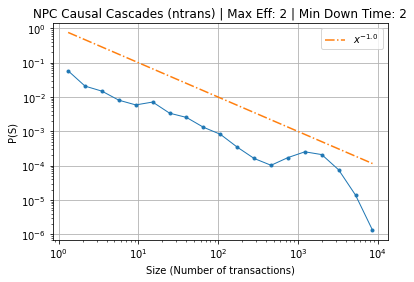

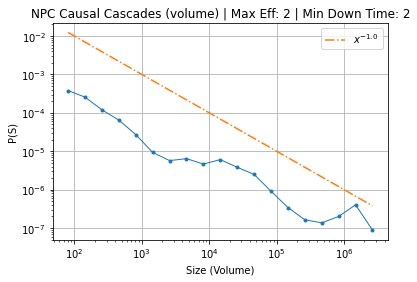

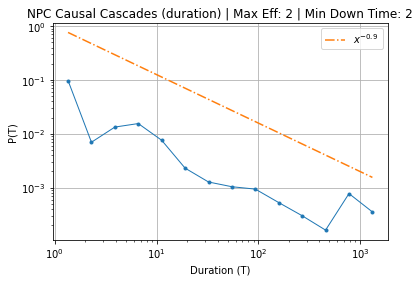

In [9]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*1, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9), '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

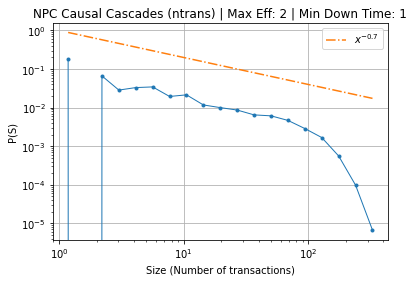

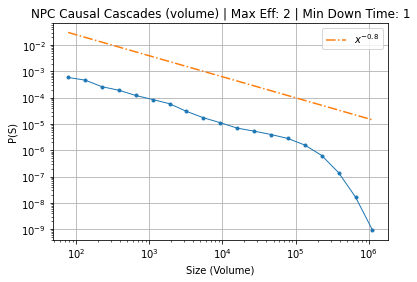

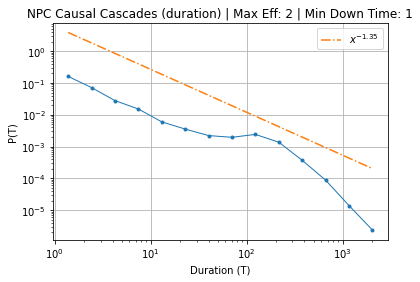

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

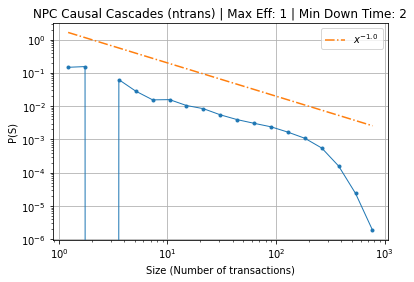

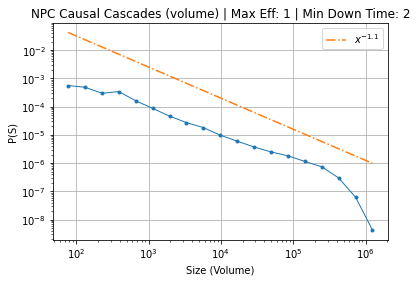

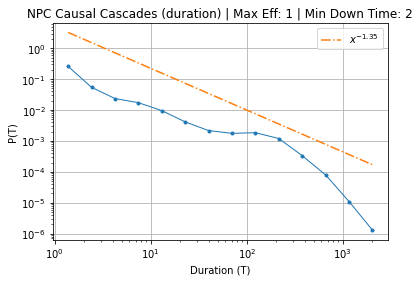

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

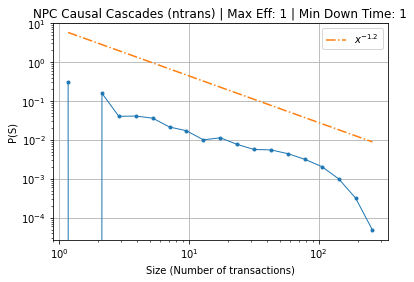

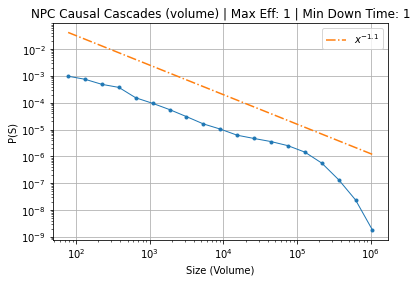

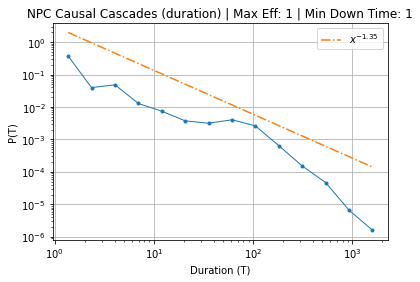

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]